In [56]:
import pandas as pd
all_nba = pd.read_csv('all_nba_players.csv')
all_players = pd.read_csv('all_players.csv')

In [57]:
pd.set_option('display.max_columns', None)
all_players = all_players.drop(['Unnamed: 0'], axis=1)

In [58]:
all_players.head()

,PLAYER_ID,PLAYER_NAME,TEAM_ID,TEAM_ABBREVIATION,AGE,GP_RANK,W_RANK,L_RANK,W_PCT_RANK,MIN_RANK,E_OFF_RATING_RANK,OFF_RATING_RANK,sp_work_OFF_RATING_RANK,E_DEF_RATING_RANK,DEF_RATING_RANK,sp_work_DEF_RATING_RANK,E_NET_RATING_RANK,NET_RATING_RANK,sp_work_NET_RATING_RANK,AST_PCT_RANK,AST_TO_RANK,AST_RATIO_RANK,OREB_PCT_RANK,DREB_PCT_RANK,REB_PCT_RANK,TM_TOV_PCT_RANK,E_TOV_PCT_RANK,EFG_PCT_RANK,TS_PCT_RANK,USG_PCT_RANK,E_USG_PCT_RANK,E_PACE_RANK,PACE_RANK,sp_work_PACE_RANK,PIE_RANK,FGM_RANK,FGA_RANK,FGM_PG_RANK,FGA_PG_RANK,FG_PCT_RANK,SEASON_ID
0,920,A.C. Green,1610612748,MIA,37.0,2,38,262,130,253,350,349,349,16,17,17,107,95,95,374,283,336,126,136,131,116,118,278,258,359,358,417,412,412,158,213,216,281,286,171,2000-01
1,2062,A.J. Guyton,1610612741,CHI,23.0,334,381,204,419,228,402,376,376,346,318,318,404,397,397,107,38,105,371,427,428,53,55,178,252,254,260,408,416,416,282,291,285,222,208,293,2000-01
2,243,Aaron McKie,1610612755,PHI,28.0,120,31,178,57,89,110,103,103,66,65,65,39,29,29,57,111,67,385,227,272,348,343,60,73,183,186,282,289,289,68,80,92,93,102,106,2000-01
3,1425,Aaron Williams,1610612751,NJN,29.0,2,223,427,358,115,324,288,288,373,378,378,373,357,357,316,323,333,85,74,79,293,292,241,119,215,224,262,274,274,151,105,109,133,140,141,2000-01
4,228,Adam Keefe,1610612744,GSW,31.0,192,318,420,407,317,357,353,353,336,365,365,372,387,387,328,272,216,61,139,111,356,357,349,347,408,410,151,160,160,336,306,300,369,374,300,2000-01


In [59]:
all_nba = all_nba.drop(['Unnamed: 0'], axis=1)

In [60]:
all_nba.head()

,Season,Tm,C,F,F2,G,G2,C_id,F_id,F2_id,G_id,G2_id
0,2022-23,1st,Joel Embiid,Giannis Antetokounmpo,Jayson Tatum,Luka Dončić,Shai Gilgeous-Alexander,203954,203507,1628369,1629029,1628983
1,2022-23,2nd,Nikola Jokić,Jimmy Butler,Jaylen Brown,Donovan Mitchell,Stephen Curry,203999,202710,1627759,1628378,201939
2,2022-23,3rd,Domantas Sabonis,LeBron James,Julius Randle,De'Aaron Fox,Damian Lillard,1627734,2544,203944,1628368,203081
3,2021-22,1st,Nikola Jokić,Giannis Antetokounmpo,Jayson Tatum,Luka Dončić,Devin Booker,203999,203507,1628369,1629029,1626164
4,2021-22,2nd,Joel Embiid,Kevin Durant,DeMar DeRozan,Ja Morant,Stephen Curry,203954,201142,201942,1629630,201939


In [61]:
all_players['ALL_NBA'] = [None for _ in range(all_players.shape[0])]

In [62]:
position_ids = (all_nba.columns[-5:])

In [63]:
for index, row in all_nba.iterrows():
    for pos_id in position_ids:
        temp = all_players[(all_players['PLAYER_ID'] == row[pos_id]) & (all_players['SEASON_ID'] == row['Season'])]
        if not temp.empty:
            all_players.loc[temp.index, 'ALL_NBA'] = [row['Tm'] for _ in range(temp.shape[0])]

In [64]:
all_players['ALL_NBA'].isna().value_counts()

ALL_NBA
True     10742
False      345
Name: count, dtype: int64

In [65]:
all_players['IS_ALL_NBA'] = all_players['ALL_NBA'].isna()

In [66]:
all_players.columns

Index(['PLAYER_ID', 'PLAYER_NAME', 'TEAM_ID', 'TEAM_ABBREVIATION', 'AGE',
       'GP_RANK', 'W_RANK', 'L_RANK', 'W_PCT_RANK', 'MIN_RANK',
       'E_OFF_RATING_RANK', 'OFF_RATING_RANK', 'sp_work_OFF_RATING_RANK',
       'E_DEF_RATING_RANK', 'DEF_RATING_RANK', 'sp_work_DEF_RATING_RANK',
       'E_NET_RATING_RANK', 'NET_RATING_RANK', 'sp_work_NET_RATING_RANK',
       'AST_PCT_RANK', 'AST_TO_RANK', 'AST_RATIO_RANK', 'OREB_PCT_RANK',
       'DREB_PCT_RANK', 'REB_PCT_RANK', 'TM_TOV_PCT_RANK', 'E_TOV_PCT_RANK',
       'EFG_PCT_RANK', 'TS_PCT_RANK', 'USG_PCT_RANK', 'E_USG_PCT_RANK',
       'E_PACE_RANK', 'PACE_RANK', 'sp_work_PACE_RANK', 'PIE_RANK', 'FGM_RANK',
       'FGA_RANK', 'FGM_PG_RANK', 'FGA_PG_RANK', 'FG_PCT_RANK', 'SEASON_ID',
       'ALL_NBA', 'IS_ALL_NBA'],
      dtype='object')

In [67]:
features_all = ['AGE',
       'GP_RANK', 'W_RANK', 'L_RANK', 'W_PCT_RANK', 'MIN_RANK',
       'E_OFF_RATING_RANK', 'OFF_RATING_RANK', 'sp_work_OFF_RATING_RANK',
       'E_DEF_RATING_RANK', 'DEF_RATING_RANK', 'sp_work_DEF_RATING_RANK',
       'E_NET_RATING_RANK', 'NET_RATING_RANK', 'sp_work_NET_RATING_RANK',
       'AST_PCT_RANK', 'AST_TO_RANK', 'AST_RATIO_RANK', 'OREB_PCT_RANK',
       'DREB_PCT_RANK', 'REB_PCT_RANK', 'TM_TOV_PCT_RANK', 'E_TOV_PCT_RANK',
       'EFG_PCT_RANK', 'TS_PCT_RANK', 'USG_PCT_RANK', 'E_USG_PCT_RANK',
       'E_PACE_RANK', 'PACE_RANK', 'sp_work_PACE_RANK', 'PIE_RANK', 'FGM_RANK',
       'FGA_RANK', 'FGM_PG_RANK', 'FGA_PG_RANK', 'FG_PCT_RANK']

In [68]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_curve, auc
import numpy as np
features = []
y = all_players['IS_ALL_NBA']
for feature in features_all:
    x = np.array(list(all_players[feature])).reshape(-1, 1)
    x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)
    logr = LogisticRegression()
    logr.fit(x_train, y_train)
    y_prob = logr.predict_proba(x_test)[:, 1]
    fpr, tpr, thresholds = roc_curve(y_test, y_prob)
    roc_auc = auc(fpr, tpr)
    if roc_auc >= .7:
        features.append(feature)

In [69]:
features

['GP_RANK',
 'W_RANK',
 'W_PCT_RANK',
 'MIN_RANK',
 'E_OFF_RATING_RANK',
 'OFF_RATING_RANK',
 'sp_work_OFF_RATING_RANK',
 'E_NET_RATING_RANK',
 'NET_RATING_RANK',
 'sp_work_NET_RATING_RANK',
 'AST_PCT_RANK',
 'EFG_PCT_RANK',
 'TS_PCT_RANK',
 'USG_PCT_RANK',
 'E_USG_PCT_RANK',
 'PIE_RANK',
 'FGM_RANK',
 'FGA_RANK',
 'FGM_PG_RANK',
 'FGA_PG_RANK',
 'FG_PCT_RANK']

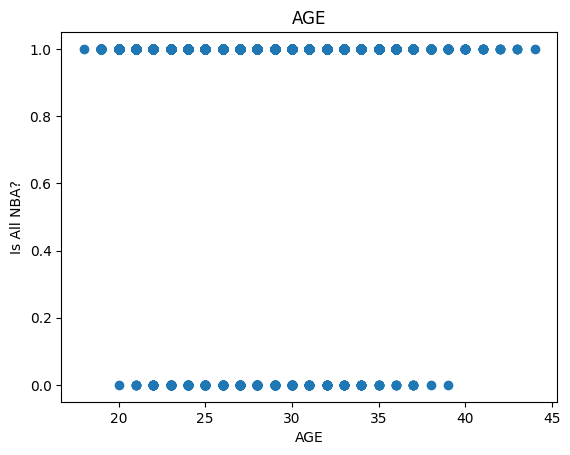

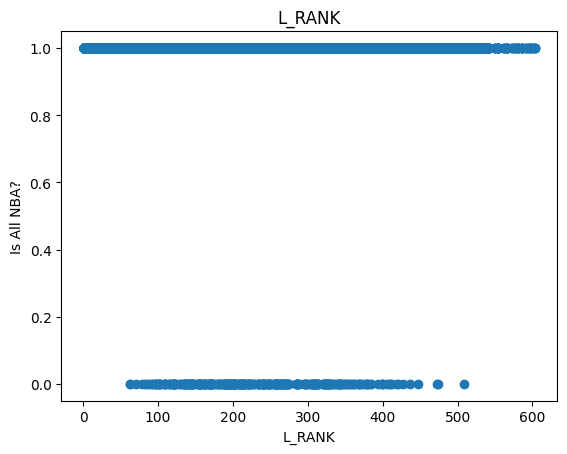

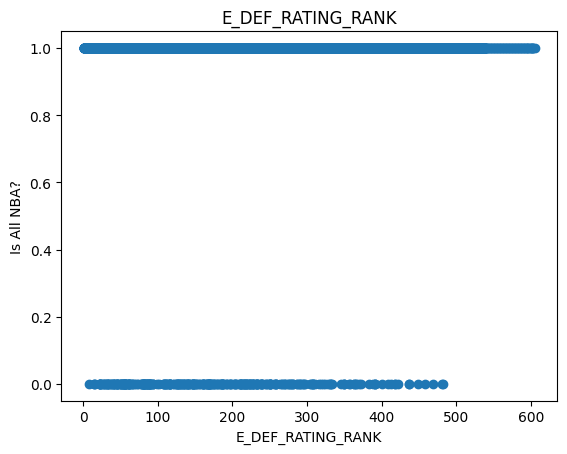

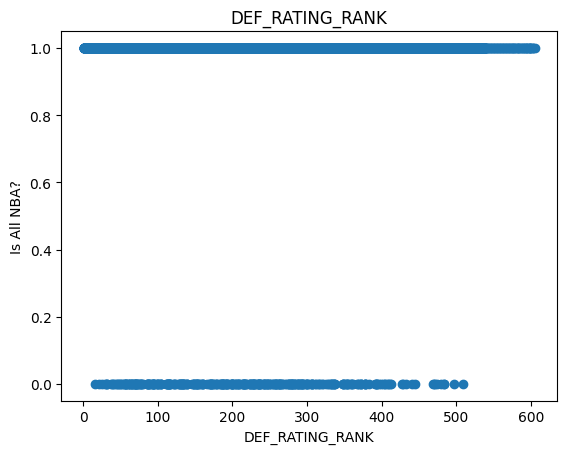

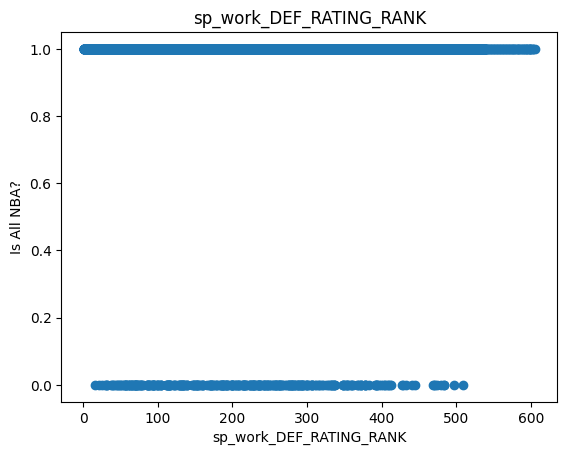

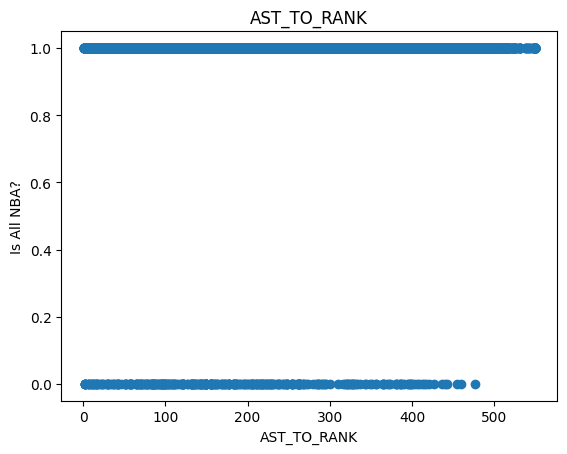

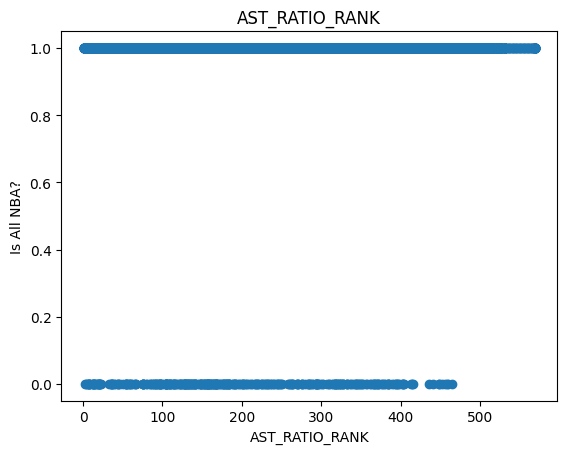

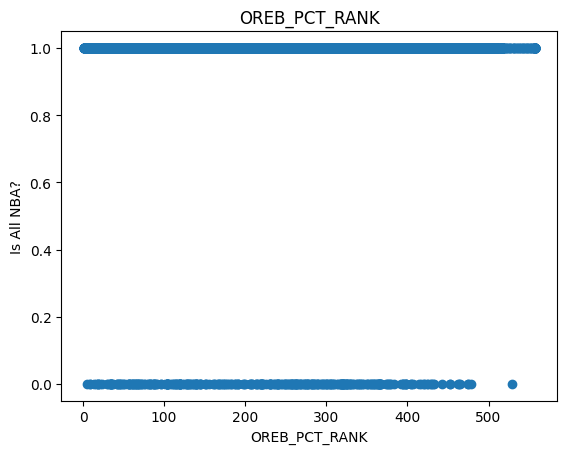

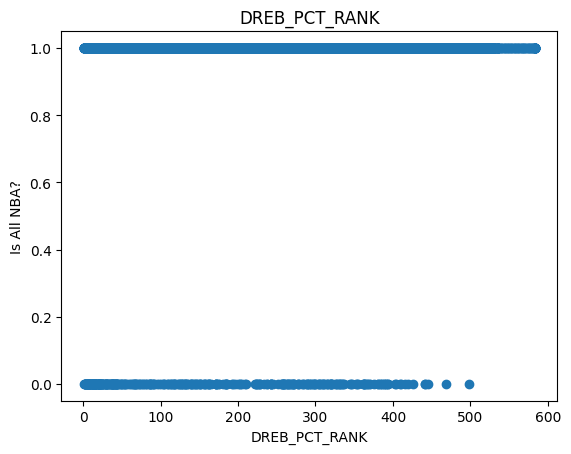

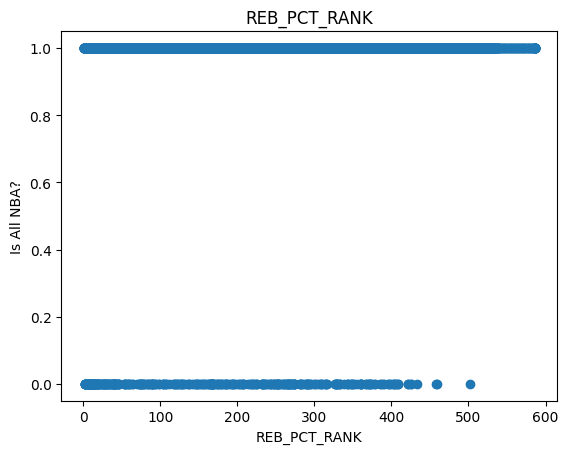

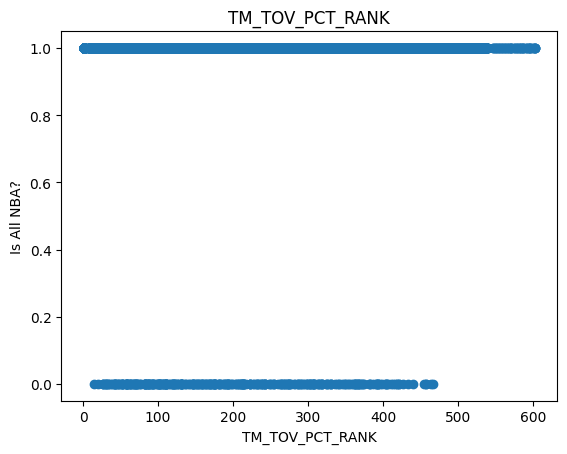

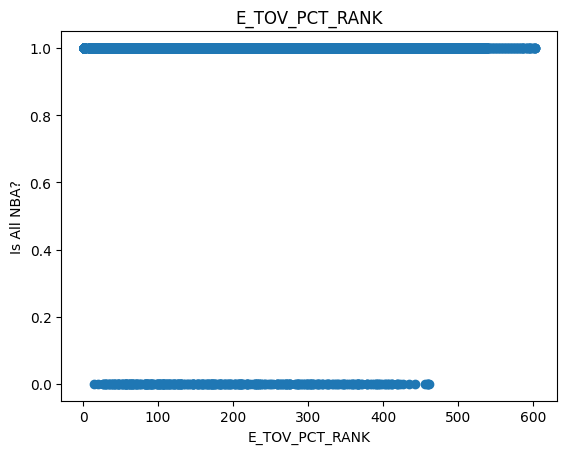

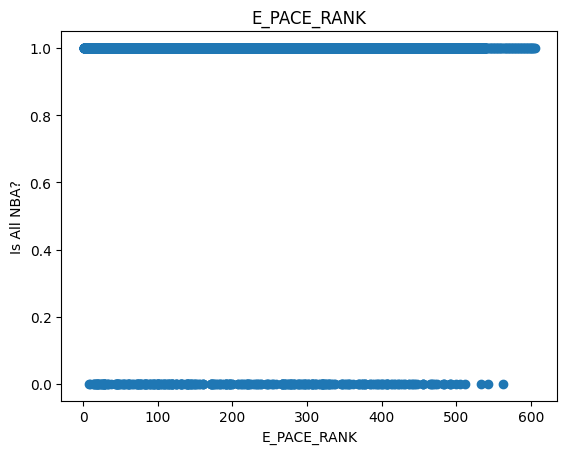

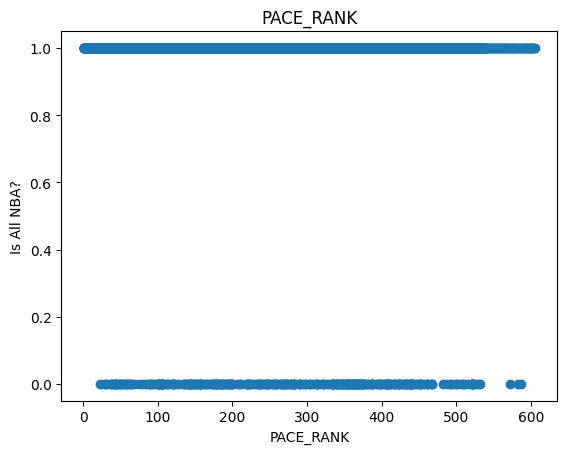

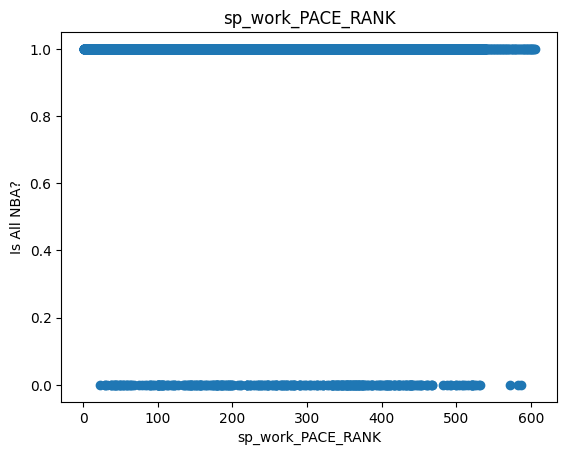

In [70]:
import matplotlib.pyplot as plt
for f in features_all:
    if f not in features:
        plt.title(f)
        plt.xlabel(f)
        plt.ylabel('Is All NBA?')
        plt.scatter(all_players[f], y)
        plt.show()



In [71]:
all_players[features].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11087 entries, 0 to 11086
Data columns (total 21 columns):
 #   Column                   Non-Null Count  Dtype
---  ------                   --------------  -----
 0   GP_RANK                  11087 non-null  int64
 1   W_RANK                   11087 non-null  int64
 2   W_PCT_RANK               11087 non-null  int64
 3   MIN_RANK                 11087 non-null  int64
 4   E_OFF_RATING_RANK        11087 non-null  int64
 5   OFF_RATING_RANK          11087 non-null  int64
 6   sp_work_OFF_RATING_RANK  11087 non-null  int64
 7   E_NET_RATING_RANK        11087 non-null  int64
 8   NET_RATING_RANK          11087 non-null  int64
 9   sp_work_NET_RATING_RANK  11087 non-null  int64
 10  AST_PCT_RANK             11087 non-null  int64
 11  EFG_PCT_RANK             11087 non-null  int64
 12  TS_PCT_RANK              11087 non-null  int64
 13  USG_PCT_RANK             11087 non-null  int64
 14  E_USG_PCT_RANK           11087 non-null  int64
 15  PI

In [72]:
from nba_api.stats.endpoints import leaguedashplayerstats
current = leaguedashplayerstats.LeagueDashPlayerStats(season='2023-24', measure_type_detailed_defense='Advanced').get_data_frames()[0]

In [73]:
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.preprocessing import StandardScaler
x = all_players[features]
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)
logr = LogisticRegression()
scaler = StandardScaler()
x_train_scaled = scaler.fit_transform(x_train)
x_test_scaled = scaler.transform(x_test)
logr = LogisticRegression(max_iter=1000)
logr.fit(x_train_scaled, y_train)

predictions = logr.predict(x_test_scaled)

print(classification_report(y_test, predictions))
print(confusion_matrix(y_test, predictions))

              precision    recall  f1-score   support

       False       0.84      0.66      0.74        74
        True       0.99      1.00      0.99      2144

    accuracy                           0.98      2218
   macro avg       0.92      0.83      0.87      2218
weighted avg       0.98      0.98      0.98      2218

[[  49   25]
 [   9 2135]]


In [74]:
scaled_x = scaler.transform(x)
scaled_current = scaler.transform(current[features])

In [75]:
logr = logr.fit(scaled_x, y)

In [76]:
current['not_all_nba_logr'] = logr.predict(scaled_current)
current['not_all_nba_logr_prob'] = logr.predict_proba(scaled_current)[:, 0]

In [77]:
current['not_all_nba_logr'].value_counts()

not_all_nba_logr
True     559
False     13
Name: count, dtype: int64

In [78]:
current[current['not_all_nba_logr'] == False]

,PLAYER_ID,PLAYER_NAME,NICKNAME,TEAM_ID,TEAM_ABBREVIATION,AGE,GP,W,L,W_PCT,MIN,E_OFF_RATING,OFF_RATING,sp_work_OFF_RATING,E_DEF_RATING,DEF_RATING,sp_work_DEF_RATING,E_NET_RATING,NET_RATING,sp_work_NET_RATING,AST_PCT,AST_TO,AST_RATIO,OREB_PCT,DREB_PCT,REB_PCT,TM_TOV_PCT,E_TOV_PCT,EFG_PCT,TS_PCT,USG_PCT,E_USG_PCT,E_PACE,PACE,PACE_PER40,sp_work_PACE,PIE,POSS,FGM,FGA,FGM_PG,FGA_PG,FG_PCT,GP_RANK,W_RANK,L_RANK,W_PCT_RANK,MIN_RANK,E_OFF_RATING_RANK,OFF_RATING_RANK,sp_work_OFF_RATING_RANK,E_DEF_RATING_RANK,DEF_RATING_RANK,sp_work_DEF_RATING_RANK,E_NET_RATING_RANK,NET_RATING_RANK,sp_work_NET_RATING_RANK,AST_PCT_RANK,AST_TO_RANK,AST_RATIO_RANK,OREB_PCT_RANK,DREB_PCT_RANK,REB_PCT_RANK,TM_TOV_PCT_RANK,E_TOV_PCT_RANK,EFG_PCT_RANK,TS_PCT_RANK,USG_PCT_RANK,E_USG_PCT_RANK,E_PACE_RANK,PACE_RANK,sp_work_PACE_RANK,PIE_RANK,FGM_RANK,FGA_RANK,FGM_PG_RANK,FGA_PG_RANK,FG_PCT_RANK,not_all_nba_logr,not_all_nba_logr_prob
28,203076,Anthony Davis,Anthony,1610612747,LAL,31.0,76,45,31,0.592,35.5,115.0,116.5,116.5,112.1,114.0,114.0,2.8,2.6,2.6,0.151,1.67,13.8,0.093,0.252,0.176,8.3,8.2,0.567,0.621,0.261,0.266,103.60,102.06,85.05,102.06,0.168,5743,713,1283,9.4,16.9,0.556,61,66,406,184,14,143,105,105,282,350,350,184,185,185,203,333,402,69,19,26,190,188,178,98,47,49,84,183,183,13,9,19,12,35,78,False,0.675322
29,1630162,Anthony Edwards,Anthony,1610612750,MIN,22.0,79,54,25,0.684,35.1,114.3,115.8,115.8,106.6,108.5,108.5,7.7,7.3,7.3,0.241,1.68,16.8,0.020,0.131,0.078,10.0,9.9,0.522,0.575,0.314,0.322,99.69,98.18,81.82,98.18,0.145,5675,718,1558,9.1,19.7,0.461,30,18,311,67,22,171,128,128,74,117,117,73,77,77,92,330,301,429,230,291,341,339,333,247,9,10,374,494,494,35,8,3,15,8,252,False,0.679442
144,1626164,Devin Booker,Devin,1610612756,PHX,27.0,68,43,25,0.632,36.0,117.8,119.3,119.3,112.4,113.5,113.5,5.4,5.8,5.8,0.299,2.65,22.1,0.024,0.098,0.063,8.3,8.3,0.550,0.611,0.289,0.297,101.12,99.96,83.30,99.96,0.142,5103,642,1305,9.4,19.2,0.492,148,79,311,118,8,62,52,52,292,323,323,117,99,99,33,119,163,387,397,389,200,193,233,119,23,24,268,351,351,42,16,17,11,13,163,False,0.562385
184,203507,Giannis Antetokounmpo,Giannis,1610612749,MIL,29.0,73,45,28,0.616,35.2,118.7,119.8,119.8,112.5,113.2,113.2,6.2,6.6,6.6,0.314,1.90,19.6,0.077,0.237,0.159,10.3,10.2,0.624,0.649,0.320,0.327,102.89,102.10,85.09,102.10,0.197,5451,837,1369,11.5,18.8,0.611,99,66,361,150,21,42,43,43,296,311,311,100,88,88,22,271,218,114,29,44,368,366,53,55,6,6,124,180,180,7,1,13,3,19,37,False,0.842165
233,1628973,Jalen Brunson,Jalen,1610612752,NYK,27.0,77,49,28,0.636,35.4,117.9,121.2,121.2,111.9,112.6,112.6,6.0,8.6,8.6,0.315,2.79,20.5,0.015,0.088,0.051,7.4,7.2,0.543,0.592,0.311,0.321,98.30,96.68,80.56,96.68,0.156,5508,790,1648,10.3,21.4,0.479,54,29,361,108,16,59,22,22,277,287,287,108,64,64,20,103,200,480,446,480,131,125,250,182,11,11,493,555,555,23,5,2,6,3,199,False,0.819822
268,1628369,Jayson Tatum,Jayson,1610612738,BOS,26.0,74,57,17,0.770,35.7,120.4,121.7,121.7,109.4,110.5,110.5,11.0,11.2,11.2,0.211,1.94,16.7,0.026,0.187,0.110,8.6,8.6,0.552,0.604,0.296,0.304,99.67,98.64,82.20,98.64,0.155,5436,672,1426,9.1,19.3,0.471,87,4,199,29,11,25,18,18,143,190,190,40,37,37,123,264,304,374,91,140,227,221,229,137,19,19,375,451,451,25,12,9,16,11,217,False,0.899843
283,203954,Joel Embiid,Joel,1610612755,PHI,30.0,39,31,8,0.795,33.6,118.4,119.8,119.8,108.4,109.5,109.5,10.0,10.3,10.3,0.315,1.46,15.4,0.074,0.239,0.160,10.6,10.6,0.561,0.644,0.387,0.393,102.20,101.09,84.24,101.09,0.225,2750,450,851,11.5,21.8,0.529,355,193,110,19,44,52,44,44,104,147,147,46,44,44,21,387,351,123,26,42,386,386,198,60,2,2,179,257,257,3,61,75,1,2,105,False,0.616492
324,202695,Kawhi Leonard,Kawhi,1610612746,LAC,32.0,68,44,24,0.647,34.3,117.9,119.3,119.3,109.4,111.1,111.1,8.4,8.2,8.2,0.165,2.05,14.9,0.039,0.138,0.091,7.3,7.2,0.585,0.626,0.261,0.267,99.12,97.77,81.47,97.77,0.154,4747,610,1162,9.0,17.1,0.525,148,72,282,103,33,60,54,54,144,219,219,66,68,68,172,228,369,263,203,212,125,121,113,84,46,48,436,517,517,26,22,32,17,34,109,False,0.603540
337,201142,Kevin Dura

In [79]:
current[current['not_all_nba_logr_prob'] >= .4]

,PLAYER_ID,PLAYER_NAME,NICKNAME,TEAM_ID,TEAM_ABBREVIATION,AGE,GP,W,L,W_PCT,MIN,E_OFF_RATING,OFF_RATING,sp_work_OFF_RATING,E_DEF_RATING,DEF_RATING,sp_work_DEF_RATING,E_NET_RATING,NET_RATING,sp_work_NET_RATING,AST_PCT,AST_TO,AST_RATIO,OREB_PCT,DREB_PCT,REB_PCT,TM_TOV_PCT,E_TOV_PCT,EFG_PCT,TS_PCT,USG_PCT,E_USG_PCT,E_PACE,PACE,PACE_PER40,sp_work_PACE,PIE,POSS,FGM,FGA,FGM_PG,FGA_PG,FG_PCT,GP_RANK,W_RANK,L_RANK,W_PCT_RANK,MIN_RANK,E_OFF_RATING_RANK,OFF_RATING_RANK,sp_work_OFF_RATING_RANK,E_DEF_RATING_RANK,DEF_RATING_RANK,sp_work_DEF_RATING_RANK,E_NET_RATING_RANK,NET_RATING_RANK,sp_work_NET_RATING_RANK,AST_PCT_RANK,AST_TO_RANK,AST_RATIO_RANK,OREB_PCT_RANK,DREB_PCT_RANK,REB_PCT_RANK,TM_TOV_PCT_RANK,E_TOV_PCT_RANK,EFG_PCT_RANK,TS_PCT_RANK,USG_PCT_RANK,E_USG_PCT_RANK,E_PACE_RANK,PACE_RANK,sp_work_PACE_RANK,PIE_RANK,FGM_RANK,FGA_RANK,FGM_PG_RANK,FGA_PG_RANK,FG_PCT_RANK,not_all_nba_logr,not_all_nba_logr_prob
28,203076,Anthony Davis,Anthony,1610612747,LAL,31.0,76,45,31,0.592,35.5,115.0,116.5,116.5,112.1,114.0,114.0,2.8,2.6,2.6,0.151,1.67,13.8,0.093,0.252,0.176,8.3,8.2,0.567,0.621,0.261,0.266,103.60,102.06,85.05,102.06,0.168,5743,713,1283,9.4,16.9,0.556,61,66,406,184,14,143,105,105,282,350,350,184,185,185,203,333,402,69,19,26,190,188,178,98,47,49,84,183,183,13,9,19,12,35,78,False,0.675322
29,1630162,Anthony Edwards,Anthony,1610612750,MIN,22.0,79,54,25,0.684,35.1,114.3,115.8,115.8,106.6,108.5,108.5,7.7,7.3,7.3,0.241,1.68,16.8,0.020,0.131,0.078,10.0,9.9,0.522,0.575,0.314,0.322,99.69,98.18,81.82,98.18,0.145,5675,718,1558,9.1,19.7,0.461,30,18,311,67,22,171,128,128,74,117,117,73,77,77,92,330,301,429,230,291,341,339,333,247,9,10,374,494,494,35,8,3,15,8,252,False,0.679442
144,1626164,Devin Booker,Devin,1610612756,PHX,27.0,68,43,25,0.632,36.0,117.8,119.3,119.3,112.4,113.5,113.5,5.4,5.8,5.8,0.299,2.65,22.1,0.024,0.098,0.063,8.3,8.3,0.550,0.611,0.289,0.297,101.12,99.96,83.30,99.96,0.142,5103,642,1305,9.4,19.2,0.492,148,79,311,118,8,62,52,52,292,323,323,117,99,99,33,119,163,387,397,389,200,193,233,119,23,24,268,351,351,42,16,17,11,13,163,False,0.562385
150,1627734,Domantas Sabonis,Domantas,1610612758,SAC,27.0,82,46,36,0.561,35.7,114.2,116.0,116.0,114.0,115.2,115.2,0.1,0.8,0.8,0.334,2.47,30.8,0.097,0.295,0.192,12.4,12.4,0.609,0.637,0.220,0.223,100.93,99.63,83.03,99.63,0.169,6086,634,1068,7.7,13.0,0.594,2,52,469,248,12,178,121,121,372,415,415,249,229,229,15,157,48,60,7,11,487,487,73,68,127,129,287,385,385,11,19,43,43,77,49,True,0.493582
184,203507,Giannis Antetokounmpo,Giannis,1610612749,MIL,29.0,73,45,28,0.616,35.2,118.7,119.8,119.8,112.5,113.2,113.2,6.2,6.6,6.6,0.314,1.90,19.6,0.077,0.237,0.159,10.3,10.2,0.624,0.649,0.320,0.327,102.89,102.10,85.09,102.10,0.197,5451,837,1369,11.5,18.8,0.611,99,66,361,150,21,42,43,43,296,311,311,100,88,88,22,271,218,114,29,44,368,366,53,55,6,6,124,180,180,7,1,13,3,19,37,False,0.842165
233,1628973,Jalen Brunson,Jalen,1610612752,NYK,27.0,77,49,28,0.636,35.4,117.9,121.2,121.2,111.9,112.6,112.6,6.0,8.6,8.6,0.315,2.79,20.5,0.015,0.088,0.051,7.4,7.2,0.543,0.592,0.311,0.321,98.30,96.68,80.56,96.68,0.156,5508,790,1648,10.3,21.4,0.479,54,29,361,108,16,59,22,22,277,287,287,108,64,64,20,103,200,480,446,480,131,125,250,182,11,11,493,555,555,23,5,2,6,3,199,False,0.819822
268,1628369,Jayson Tatum,Jayson,1610612738,BOS,26.0,74,57,17,0.770,35.7,120.4,121.7,121.7,109.4,110.5,110.5,11.0,11.2,11.2,0.211,1.94,16.7,0.026,0.187,0.110,8.6,8.6,0.552,0.604,0.296,0.304,99.67,98.64,82.20,98.64,0.155,5436,672,1426,9.1,19.3,0.471,87,4,199,29,11,25,18,18,143,190,190,40,37,37,123,264,304,374,91,140,227,221,229,137,19,19,375,451,451,25,12,9,16,11,217,False,0.899843
283,203954,Joel Embiid,Joel,1610612755,PHI,30.0,39,31,8,0.795,33.6,118.4,119.8,119.8,108.4,109.5,109.5,10.0,10.3,10.3,0.315,1.46,15.4,0.074,0.239,0.160,10.6,10.6,0.561,0.644,0.387,0.393,102.20,101.09,84.24,101.09,0.225,2750,450,851,11.5,21.8,0.529,355,193,110,19,44,52,44,44,104,147,147,46,44,44,21,387,351,123,26,42,386,386,198,60,2,2,179,257,257,3,61,75,1,2,105,False,0.616492
324,202695,Kaw

In [80]:
from sklearn.svm import SVC
kernels = ['linear', 'poly', 'rbf', 'sigmoid']
svm_classifiers = [SVC(kernel=kernel) for kernel in kernels]
best_kernel = ''
best_accuracy = 0
for i, svm in enumerate(svm_classifiers):
    svm.fit(x_train, y_train)
    y_pred = svm.predict(x_test)
    print(kernels[i])
    cm = confusion_matrix(y_test, y_pred)
    accuracy = (cm[0][0] + cm[1][1]) / cm.sum()
    if accuracy > best_accuracy:
        best_accuracy = accuracy
        best_kernel = kernels[i]
    print(cm)
    print(classification_report(y_test, y_pred))
print(best_kernel)
print(best_accuracy)

linear
[[  48   26]
 [  13 2131]]
              precision    recall  f1-score   support

       False       0.79      0.65      0.71        74
        True       0.99      0.99      0.99      2144

    accuracy                           0.98      2218
   macro avg       0.89      0.82      0.85      2218
weighted avg       0.98      0.98      0.98      2218

poly
[[  60   14]
 [  24 2120]]
              precision    recall  f1-score   support

       False       0.71      0.81      0.76        74
        True       0.99      0.99      0.99      2144

    accuracy                           0.98      2218
   macro avg       0.85      0.90      0.88      2218
weighted avg       0.98      0.98      0.98      2218

rbf
[[  44   30]
 [   8 2136]]
              precision    recall  f1-score   support

       False       0.85      0.59      0.70        74
        True       0.99      1.00      0.99      2144

    accuracy                           0.98      2218
   macro avg       0.92      0.

In [81]:
ideal_svm = SVC(kernel=best_kernel, probability=True)

In [82]:
ideal_svm.fit(scaled_x, y)
current['not_all_nba_svm'] = ideal_svm.predict(scaled_current)
current['not_all_nba_svm_prob'] = ideal_svm.predict_proba(scaled_current)[:, 0]

In [83]:
current['not_all_nba_svm'].value_counts()

not_all_nba_svm
True     560
False     12
Name: count, dtype: int64

In [84]:
current[current['not_all_nba_svm'] == False]

,PLAYER_ID,PLAYER_NAME,NICKNAME,TEAM_ID,TEAM_ABBREVIATION,AGE,GP,W,L,W_PCT,MIN,E_OFF_RATING,OFF_RATING,sp_work_OFF_RATING,E_DEF_RATING,DEF_RATING,sp_work_DEF_RATING,E_NET_RATING,NET_RATING,sp_work_NET_RATING,AST_PCT,AST_TO,AST_RATIO,OREB_PCT,DREB_PCT,REB_PCT,TM_TOV_PCT,E_TOV_PCT,EFG_PCT,TS_PCT,USG_PCT,E_USG_PCT,E_PACE,PACE,PACE_PER40,sp_work_PACE,PIE,POSS,FGM,FGA,FGM_PG,FGA_PG,FG_PCT,GP_RANK,W_RANK,L_RANK,W_PCT_RANK,MIN_RANK,E_OFF_RATING_RANK,OFF_RATING_RANK,sp_work_OFF_RATING_RANK,E_DEF_RATING_RANK,DEF_RATING_RANK,sp_work_DEF_RATING_RANK,E_NET_RATING_RANK,NET_RATING_RANK,sp_work_NET_RATING_RANK,AST_PCT_RANK,AST_TO_RANK,AST_RATIO_RANK,OREB_PCT_RANK,DREB_PCT_RANK,REB_PCT_RANK,TM_TOV_PCT_RANK,E_TOV_PCT_RANK,EFG_PCT_RANK,TS_PCT_RANK,USG_PCT_RANK,E_USG_PCT_RANK,E_PACE_RANK,PACE_RANK,sp_work_PACE_RANK,PIE_RANK,FGM_RANK,FGA_RANK,FGM_PG_RANK,FGA_PG_RANK,FG_PCT_RANK,not_all_nba_logr,not_all_nba_logr_prob,not_all_nba_svm,not_all_nba_svm_prob
29,1630162,Anthony Edwards,Anthony,1610612750,MIN,22.0,79,54,25,0.684,35.1,114.3,115.8,115.8,106.6,108.5,108.5,7.7,7.3,7.3,0.241,1.68,16.8,0.020,0.131,0.078,10.0,9.9,0.522,0.575,0.314,0.322,99.69,98.18,81.82,98.18,0.145,5675,718,1558,9.1,19.7,0.461,30,18,311,67,22,171,128,128,74,117,117,73,77,77,92,330,301,429,230,291,341,339,333,247,9,10,374,494,494,35,8,3,15,8,252,False,0.679442,False,0.813132
144,1626164,Devin Booker,Devin,1610612756,PHX,27.0,68,43,25,0.632,36.0,117.8,119.3,119.3,112.4,113.5,113.5,5.4,5.8,5.8,0.299,2.65,22.1,0.024,0.098,0.063,8.3,8.3,0.550,0.611,0.289,0.297,101.12,99.96,83.30,99.96,0.142,5103,642,1305,9.4,19.2,0.492,148,79,311,118,8,62,52,52,292,323,323,117,99,99,33,119,163,387,397,389,200,193,233,119,23,24,268,351,351,42,16,17,11,13,163,False,0.562385,False,0.739430
184,203507,Giannis Antetokounmpo,Giannis,1610612749,MIL,29.0,73,45,28,0.616,35.2,118.7,119.8,119.8,112.5,113.2,113.2,6.2,6.6,6.6,0.314,1.90,19.6,0.077,0.237,0.159,10.3,10.2,0.624,0.649,0.320,0.327,102.89,102.10,85.09,102.10,0.197,5451,837,1369,11.5,18.8,0.611,99,66,361,150,21,42,43,43,296,311,311,100,88,88,22,271,218,114,29,44,368,366,53,55,6,6,124,180,180,7,1,13,3,19,37,False,0.842165,False,0.961505
233,1628973,Jalen Brunson,Jalen,1610612752,NYK,27.0,77,49,28,0.636,35.4,117.9,121.2,121.2,111.9,112.6,112.6,6.0,8.6,8.6,0.315,2.79,20.5,0.015,0.088,0.051,7.4,7.2,0.543,0.592,0.311,0.321,98.30,96.68,80.56,96.68,0.156,5508,790,1648,10.3,21.4,0.479,54,29,361,108,16,59,22,22,277,287,287,108,64,64,20,103,200,480,446,480,131,125,250,182,11,11,493,555,555,23,5,2,6,3,199,False,0.819822,False,0.946487
268,1628369,Jayson Tatum,Jayson,1610612738,BOS,26.0,74,57,17,0.770,35.7,120.4,121.7,121.7,109.4,110.5,110.5,11.0,11.2,11.2,0.211,1.94,16.7,0.026,0.187,0.110,8.6,8.6,0.552,0.604,0.296,0.304,99.67,98.64,82.20,98.64,0.155,5436,672,1426,9.1,19.3,0.471,87,4,199,29,11,25,18,18,143,190,190,40,37,37,123,264,304,374,91,140,227,221,229,137,19,19,375,451,451,25,12,9,16,11,217,False,0.899843,False,0.954501
283,203954,Joel Embiid,Joel,1610612755,PHI,30.0,39,31,8,0.795,33.6,118.4,119.8,119.8,108.4,109.5,109.5,10.0,10.3,10.3,0.315,1.46,15.4,0.074,0.239,0.160,10.6,10.6,0.561,0.644,0.387,0.393,102.20,101.09,84.24,101.09,0.225,2750,450,851,11.5,21.8,0.529,355,193,110,19,44,52,44,44,104,147,147,46,44,44,21,387,351,123,26,42,386,386,198,60,2,2,179,257,257,3,61,75,1,2,105,False,0.616492,False,0.797508
337,201142,Kevin Durant,Kevin,1610612756,PHX,35.0,75,44,31,0.587,37.2,116.7,118.1,118.1,111.8,113.3,113.3,5.0,4.8,4.8,0.213,1.55,16.9,0.016,0.155,0.089,10.9,10.9,0.581,0.626,0.283,0.288,101.52,100.24,83.53,100.24,0.148,5832,751,1436,10.0,19.1,0.523,76,72,406,195,5,83,68,68,262,316,316,127,124,124,117,362,298,473,156,216,410,407,128,83,30,32,228,329,329,34,6,8,7,14,112,False,0.548836,False,0.575857
364,2544,LeBron James,LeBron,1610612747,LAL,39.0,71,41,30,0.577,35.3,116.1,117.4,117.4,112.3,113.6,113.6,3.8,3.8,3.8,0.358,2.40,26.0,0.026,0.172,0.104,10.8,10.7,0.599,0.630,0.285,0.292,102.65,101.55,84.63,101.55,0.169,5305,685,1269,9.6,17.9,0.540,118,97,395,215,

In [85]:
current[current['not_all_nba_svm_prob'] >= .35]

,PLAYER_ID,PLAYER_NAME,NICKNAME,TEAM_ID,TEAM_ABBREVIATION,AGE,GP,W,L,W_PCT,MIN,E_OFF_RATING,OFF_RATING,sp_work_OFF_RATING,E_DEF_RATING,DEF_RATING,sp_work_DEF_RATING,E_NET_RATING,NET_RATING,sp_work_NET_RATING,AST_PCT,AST_TO,AST_RATIO,OREB_PCT,DREB_PCT,REB_PCT,TM_TOV_PCT,E_TOV_PCT,EFG_PCT,TS_PCT,USG_PCT,E_USG_PCT,E_PACE,PACE,PACE_PER40,sp_work_PACE,PIE,POSS,FGM,FGA,FGM_PG,FGA_PG,FG_PCT,GP_RANK,W_RANK,L_RANK,W_PCT_RANK,MIN_RANK,E_OFF_RATING_RANK,OFF_RATING_RANK,sp_work_OFF_RATING_RANK,E_DEF_RATING_RANK,DEF_RATING_RANK,sp_work_DEF_RATING_RANK,E_NET_RATING_RANK,NET_RATING_RANK,sp_work_NET_RATING_RANK,AST_PCT_RANK,AST_TO_RANK,AST_RATIO_RANK,OREB_PCT_RANK,DREB_PCT_RANK,REB_PCT_RANK,TM_TOV_PCT_RANK,E_TOV_PCT_RANK,EFG_PCT_RANK,TS_PCT_RANK,USG_PCT_RANK,E_USG_PCT_RANK,E_PACE_RANK,PACE_RANK,sp_work_PACE_RANK,PIE_RANK,FGM_RANK,FGA_RANK,FGM_PG_RANK,FGA_PG_RANK,FG_PCT_RANK,not_all_nba_logr,not_all_nba_logr_prob,not_all_nba_svm,not_all_nba_svm_prob
28,203076,Anthony Davis,Anthony,1610612747,LAL,31.0,76,45,31,0.592,35.5,115.0,116.5,116.5,112.1,114.0,114.0,2.8,2.6,2.6,0.151,1.67,13.8,0.093,0.252,0.176,8.3,8.2,0.567,0.621,0.261,0.266,103.60,102.06,85.05,102.06,0.168,5743,713,1283,9.4,16.9,0.556,61,66,406,184,14,143,105,105,282,350,350,184,185,185,203,333,402,69,19,26,190,188,178,98,47,49,84,183,183,13,9,19,12,35,78,False,0.675322,True,0.478706
29,1630162,Anthony Edwards,Anthony,1610612750,MIN,22.0,79,54,25,0.684,35.1,114.3,115.8,115.8,106.6,108.5,108.5,7.7,7.3,7.3,0.241,1.68,16.8,0.020,0.131,0.078,10.0,9.9,0.522,0.575,0.314,0.322,99.69,98.18,81.82,98.18,0.145,5675,718,1558,9.1,19.7,0.461,30,18,311,67,22,171,128,128,74,117,117,73,77,77,92,330,301,429,230,291,341,339,333,247,9,10,374,494,494,35,8,3,15,8,252,False,0.679442,False,0.813132
109,203081,Damian Lillard,Damian,1610612749,MIL,33.0,73,48,25,0.658,35.3,118.1,119.4,119.4,110.5,112.4,112.4,7.5,6.9,6.9,0.284,2.63,23.2,0.014,0.102,0.060,8.8,8.8,0.510,0.590,0.274,0.281,103.48,102.06,85.05,102.06,0.132,5486,541,1277,7.4,17.5,0.424,99,36,311,91,18,54,51,51,206,282,282,81,82,82,44,123,147,494,377,416,249,243,364,187,34,37,89,182,182,62,31,20,51,32,392,True,0.298989,True,0.380386
144,1626164,Devin Booker,Devin,1610612756,PHX,27.0,68,43,25,0.632,36.0,117.8,119.3,119.3,112.4,113.5,113.5,5.4,5.8,5.8,0.299,2.65,22.1,0.024,0.098,0.063,8.3,8.3,0.550,0.611,0.289,0.297,101.12,99.96,83.30,99.96,0.142,5103,642,1305,9.4,19.2,0.492,148,79,311,118,8,62,52,52,292,323,323,117,99,99,33,119,163,387,397,389,200,193,233,119,23,24,268,351,351,42,16,17,11,13,163,False,0.562385,False,0.739430
152,1628378,Donovan Mitchell,Donovan,1610612739,CLE,27.0,55,36,19,0.655,35.3,115.1,115.9,115.9,107.4,108.6,108.6,7.7,7.3,7.3,0.268,2.16,19.5,0.024,0.116,0.071,9.0,9.0,0.545,0.595,0.301,0.307,100.79,99.82,83.19,99.82,0.150,4054,503,1089,9.1,19.8,0.462,258,146,226,95,19,140,124,124,86,120,120,75,78,78,58,210,223,392,295,341,258,256,246,173,14,14,296,364,364,29,44,39,13,7,246,True,0.388195,True,0.455370
184,203507,Giannis Antetokounmpo,Giannis,1610612749,MIL,29.0,73,45,28,0.616,35.2,118.7,119.8,119.8,112.5,113.2,113.2,6.2,6.6,6.6,0.314,1.90,19.6,0.077,0.237,0.159,10.3,10.2,0.624,0.649,0.320,0.327,102.89,102.10,85.09,102.10,0.197,5451,837,1369,11.5,18.8,0.611,99,66,361,150,21,42,43,43,296,311,311,100,88,88,22,271,218,114,29,44,368,366,53,55,6,6,124,180,180,7,1,13,3,19,37,False,0.842165,False,0.961505
233,1628973,Jalen Brunson,Jalen,1610612752,NYK,27.0,77,49,28,0.636,35.4,117.9,121.2,121.2,111.9,112.6,112.6,6.0,8.6,8.6,0.315,2.79,20.5,0.015,0.088,0.051,7.4,7.2,0.543,0.592,0.311,0.321,98.30,96.68,80.56,96.68,0.156,5508,790,1648,10.3,21.4,0.479,54,29,361,108,16,59,22,22,277,287,287,108,64,64,20,103,200,480,446,480,131,125,250,182,11,11,493,555,555,23,5,2,6,3,199,False,0.819822,False,0.946487
268,1628369,Jayson Tatum,Jayson,1610612738,BOS,26.0,74,57,17,0.770,35.7,120.4,121.7,121.7,109.4,110.5,110.5,11.0,11.2,11.2,0.211,1.94,16.7,0.026,0.187,0.110,8.6,8.6,0.552,0.604,0.296,0.304,99.67,98.64,82.20,98.64,0.155,5436,672,1426,9.1,19.3,0.471,87,4,

In [86]:
from sklearn.neighbors import KNeighborsClassifier
for k in range(5, 11):
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(x_train_scaled, y_train)
    y_pred = knn.predict(x_test_scaled)
    print(k)
    print(confusion_matrix(y_test, y_pred))
    print(classification_report(y_test, y_pred))

5
[[  44   30]
 [  15 2129]]
              precision    recall  f1-score   support

       False       0.75      0.59      0.66        74
        True       0.99      0.99      0.99      2144

    accuracy                           0.98      2218
   macro avg       0.87      0.79      0.83      2218
weighted avg       0.98      0.98      0.98      2218

6
[[  51   23]
 [  22 2122]]
              precision    recall  f1-score   support

       False       0.70      0.69      0.69        74
        True       0.99      0.99      0.99      2144

    accuracy                           0.98      2218
   macro avg       0.84      0.84      0.84      2218
weighted avg       0.98      0.98      0.98      2218

7
[[  44   30]
 [   8 2136]]
              precision    recall  f1-score   support

       False       0.85      0.59      0.70        74
        True       0.99      1.00      0.99      2144

    accuracy                           0.98      2218
   macro avg       0.92      0.80      0.

In [87]:
ideal_knn = KNeighborsClassifier(n_neighbors=9)
ideal_knn.fit(scaled_x, y)
current['not_all_nba_knn'] = ideal_knn.predict(scaled_current)
current['not_all_nba_knn_prob'] = ideal_knn.predict_proba(scaled_current)[:, 0]

In [88]:
current['not_all_nba_knn'].value_counts()

not_all_nba_knn
True     561
False     11
Name: count, dtype: int64

In [89]:
current[current['not_all_nba_knn'] == False]

,PLAYER_ID,PLAYER_NAME,NICKNAME,TEAM_ID,TEAM_ABBREVIATION,AGE,GP,W,L,W_PCT,MIN,E_OFF_RATING,OFF_RATING,sp_work_OFF_RATING,E_DEF_RATING,DEF_RATING,sp_work_DEF_RATING,E_NET_RATING,NET_RATING,sp_work_NET_RATING,AST_PCT,AST_TO,AST_RATIO,OREB_PCT,DREB_PCT,REB_PCT,TM_TOV_PCT,E_TOV_PCT,EFG_PCT,TS_PCT,USG_PCT,E_USG_PCT,E_PACE,PACE,PACE_PER40,sp_work_PACE,PIE,POSS,FGM,FGA,FGM_PG,FGA_PG,FG_PCT,GP_RANK,W_RANK,L_RANK,W_PCT_RANK,MIN_RANK,E_OFF_RATING_RANK,OFF_RATING_RANK,sp_work_OFF_RATING_RANK,E_DEF_RATING_RANK,DEF_RATING_RANK,sp_work_DEF_RATING_RANK,E_NET_RATING_RANK,NET_RATING_RANK,sp_work_NET_RATING_RANK,AST_PCT_RANK,AST_TO_RANK,AST_RATIO_RANK,OREB_PCT_RANK,DREB_PCT_RANK,REB_PCT_RANK,TM_TOV_PCT_RANK,E_TOV_PCT_RANK,EFG_PCT_RANK,TS_PCT_RANK,USG_PCT_RANK,E_USG_PCT_RANK,E_PACE_RANK,PACE_RANK,sp_work_PACE_RANK,PIE_RANK,FGM_RANK,FGA_RANK,FGM_PG_RANK,FGA_PG_RANK,FG_PCT_RANK,not_all_nba_logr,not_all_nba_logr_prob,not_all_nba_svm,not_all_nba_svm_prob,not_all_nba_knn,not_all_nba_knn_prob
144,1626164,Devin Booker,Devin,1610612756,PHX,27.0,68,43,25,0.632,36.0,117.8,119.3,119.3,112.4,113.5,113.5,5.4,5.8,5.8,0.299,2.65,22.1,0.024,0.098,0.063,8.3,8.3,0.550,0.611,0.289,0.297,101.12,99.96,83.30,99.96,0.142,5103,642,1305,9.4,19.2,0.492,148,79,311,118,8,62,52,52,292,323,323,117,99,99,33,119,163,387,397,389,200,193,233,119,23,24,268,351,351,42,16,17,11,13,163,False,0.562385,False,0.739430,False,0.777778
152,1628378,Donovan Mitchell,Donovan,1610612739,CLE,27.0,55,36,19,0.655,35.3,115.1,115.9,115.9,107.4,108.6,108.6,7.7,7.3,7.3,0.268,2.16,19.5,0.024,0.116,0.071,9.0,9.0,0.545,0.595,0.301,0.307,100.79,99.82,83.19,99.82,0.150,4054,503,1089,9.1,19.8,0.462,258,146,226,95,19,140,124,124,86,120,120,75,78,78,58,210,223,392,295,341,258,256,246,173,14,14,296,364,364,29,44,39,13,7,246,True,0.388195,True,0.455370,False,0.555556
184,203507,Giannis Antetokounmpo,Giannis,1610612749,MIL,29.0,73,45,28,0.616,35.2,118.7,119.8,119.8,112.5,113.2,113.2,6.2,6.6,6.6,0.314,1.90,19.6,0.077,0.237,0.159,10.3,10.2,0.624,0.649,0.320,0.327,102.89,102.10,85.09,102.10,0.197,5451,837,1369,11.5,18.8,0.611,99,66,361,150,21,42,43,43,296,311,311,100,88,88,22,271,218,114,29,44,368,366,53,55,6,6,124,180,180,7,1,13,3,19,37,False,0.842165,False,0.961505,False,0.888889
233,1628973,Jalen Brunson,Jalen,1610612752,NYK,27.0,77,49,28,0.636,35.4,117.9,121.2,121.2,111.9,112.6,112.6,6.0,8.6,8.6,0.315,2.79,20.5,0.015,0.088,0.051,7.4,7.2,0.543,0.592,0.311,0.321,98.30,96.68,80.56,96.68,0.156,5508,790,1648,10.3,21.4,0.479,54,29,361,108,16,59,22,22,277,287,287,108,64,64,20,103,200,480,446,480,131,125,250,182,11,11,493,555,555,23,5,2,6,3,199,False,0.819822,False,0.946487,False,0.888889
268,1628369,Jayson Tatum,Jayson,1610612738,BOS,26.0,74,57,17,0.770,35.7,120.4,121.7,121.7,109.4,110.5,110.5,11.0,11.2,11.2,0.211,1.94,16.7,0.026,0.187,0.110,8.6,8.6,0.552,0.604,0.296,0.304,99.67,98.64,82.20,98.64,0.155,5436,672,1426,9.1,19.3,0.471,87,4,199,29,11,25,18,18,143,190,190,40,37,37,123,264,304,374,91,140,227,221,229,137,19,19,375,451,451,25,12,9,16,11,217,False,0.899843,False,0.954501,False,0.777778
337,201142,Kevin Durant,Kevin,1610612756,PHX,35.0,75,44,31,0.587,37.2,116.7,118.1,118.1,111.8,113.3,113.3,5.0,4.8,4.8,0.213,1.55,16.9,0.016,0.155,0.089,10.9,10.9,0.581,0.626,0.283,0.288,101.52,100.24,83.53,100.24,0.148,5832,751,1436,10.0,19.1,0.523,76,72,406,195,5,83,68,68,262,316,316,127,124,124,117,362,298,473,156,216,410,407,128,83,30,32,228,329,329,34,6,8,7,14,112,False,0.548836,False,0.575857,False,0.666667
358,202681,Kyrie Irving,Kyrie,1610612742,DAL,32.0,58,39,19,0.672,35.0,118.0,119.6,119.6,111.7,112.6,112.6,6.3,6.9,6.9,0.225,2.82,18.5,0.021,0.116,0.069,6.6,6.5,0.573,0.608,0.274,0.281,102.00,100.89,84.08,100.89,0.144,4258,562,1131,9.7,19.5,0.497,232,117,226,74,23,58,48,48,259,291,291,99,83,83,104,99,247,413,300,350,87,86,151,132,35,36,190,272,272,39,28,35,9,10,157,True,0.390155,True,0.314231,False,0.555556
364,2544,LeBron James,LeBron,1610612747,LAL,39.0,71,41,30,0.577,35.3,116.1,117.4,117.4,112.3,113.6,113.6,3.8,3.8,3

In [90]:
current[current['not_all_nba_logr_prob'] >= .4]

,PLAYER_ID,PLAYER_NAME,NICKNAME,TEAM_ID,TEAM_ABBREVIATION,AGE,GP,W,L,W_PCT,MIN,E_OFF_RATING,OFF_RATING,sp_work_OFF_RATING,E_DEF_RATING,DEF_RATING,sp_work_DEF_RATING,E_NET_RATING,NET_RATING,sp_work_NET_RATING,AST_PCT,AST_TO,AST_RATIO,OREB_PCT,DREB_PCT,REB_PCT,TM_TOV_PCT,E_TOV_PCT,EFG_PCT,TS_PCT,USG_PCT,E_USG_PCT,E_PACE,PACE,PACE_PER40,sp_work_PACE,PIE,POSS,FGM,FGA,FGM_PG,FGA_PG,FG_PCT,GP_RANK,W_RANK,L_RANK,W_PCT_RANK,MIN_RANK,E_OFF_RATING_RANK,OFF_RATING_RANK,sp_work_OFF_RATING_RANK,E_DEF_RATING_RANK,DEF_RATING_RANK,sp_work_DEF_RATING_RANK,E_NET_RATING_RANK,NET_RATING_RANK,sp_work_NET_RATING_RANK,AST_PCT_RANK,AST_TO_RANK,AST_RATIO_RANK,OREB_PCT_RANK,DREB_PCT_RANK,REB_PCT_RANK,TM_TOV_PCT_RANK,E_TOV_PCT_RANK,EFG_PCT_RANK,TS_PCT_RANK,USG_PCT_RANK,E_USG_PCT_RANK,E_PACE_RANK,PACE_RANK,sp_work_PACE_RANK,PIE_RANK,FGM_RANK,FGA_RANK,FGM_PG_RANK,FGA_PG_RANK,FG_PCT_RANK,not_all_nba_logr,not_all_nba_logr_prob,not_all_nba_svm,not_all_nba_svm_prob,not_all_nba_knn,not_all_nba_knn_prob
28,203076,Anthony Davis,Anthony,1610612747,LAL,31.0,76,45,31,0.592,35.5,115.0,116.5,116.5,112.1,114.0,114.0,2.8,2.6,2.6,0.151,1.67,13.8,0.093,0.252,0.176,8.3,8.2,0.567,0.621,0.261,0.266,103.60,102.06,85.05,102.06,0.168,5743,713,1283,9.4,16.9,0.556,61,66,406,184,14,143,105,105,282,350,350,184,185,185,203,333,402,69,19,26,190,188,178,98,47,49,84,183,183,13,9,19,12,35,78,False,0.675322,True,0.478706,True,0.222222
29,1630162,Anthony Edwards,Anthony,1610612750,MIN,22.0,79,54,25,0.684,35.1,114.3,115.8,115.8,106.6,108.5,108.5,7.7,7.3,7.3,0.241,1.68,16.8,0.020,0.131,0.078,10.0,9.9,0.522,0.575,0.314,0.322,99.69,98.18,81.82,98.18,0.145,5675,718,1558,9.1,19.7,0.461,30,18,311,67,22,171,128,128,74,117,117,73,77,77,92,330,301,429,230,291,341,339,333,247,9,10,374,494,494,35,8,3,15,8,252,False,0.679442,False,0.813132,True,0.333333
144,1626164,Devin Booker,Devin,1610612756,PHX,27.0,68,43,25,0.632,36.0,117.8,119.3,119.3,112.4,113.5,113.5,5.4,5.8,5.8,0.299,2.65,22.1,0.024,0.098,0.063,8.3,8.3,0.550,0.611,0.289,0.297,101.12,99.96,83.30,99.96,0.142,5103,642,1305,9.4,19.2,0.492,148,79,311,118,8,62,52,52,292,323,323,117,99,99,33,119,163,387,397,389,200,193,233,119,23,24,268,351,351,42,16,17,11,13,163,False,0.562385,False,0.739430,False,0.777778
150,1627734,Domantas Sabonis,Domantas,1610612758,SAC,27.0,82,46,36,0.561,35.7,114.2,116.0,116.0,114.0,115.2,115.2,0.1,0.8,0.8,0.334,2.47,30.8,0.097,0.295,0.192,12.4,12.4,0.609,0.637,0.220,0.223,100.93,99.63,83.03,99.63,0.169,6086,634,1068,7.7,13.0,0.594,2,52,469,248,12,178,121,121,372,415,415,249,229,229,15,157,48,60,7,11,487,487,73,68,127,129,287,385,385,11,19,43,43,77,49,True,0.493582,True,0.132758,True,0.222222
184,203507,Giannis Antetokounmpo,Giannis,1610612749,MIL,29.0,73,45,28,0.616,35.2,118.7,119.8,119.8,112.5,113.2,113.2,6.2,6.6,6.6,0.314,1.90,19.6,0.077,0.237,0.159,10.3,10.2,0.624,0.649,0.320,0.327,102.89,102.10,85.09,102.10,0.197,5451,837,1369,11.5,18.8,0.611,99,66,361,150,21,42,43,43,296,311,311,100,88,88,22,271,218,114,29,44,368,366,53,55,6,6,124,180,180,7,1,13,3,19,37,False,0.842165,False,0.961505,False,0.888889
233,1628973,Jalen Brunson,Jalen,1610612752,NYK,27.0,77,49,28,0.636,35.4,117.9,121.2,121.2,111.9,112.6,112.6,6.0,8.6,8.6,0.315,2.79,20.5,0.015,0.088,0.051,7.4,7.2,0.543,0.592,0.311,0.321,98.30,96.68,80.56,96.68,0.156,5508,790,1648,10.3,21.4,0.479,54,29,361,108,16,59,22,22,277,287,287,108,64,64,20,103,200,480,446,480,131,125,250,182,11,11,493,555,555,23,5,2,6,3,199,False,0.819822,False,0.946487,False,0.888889
268,1628369,Jayson Tatum,Jayson,1610612738,BOS,26.0,74,57,17,0.770,35.7,120.4,121.7,121.7,109.4,110.5,110.5,11.0,11.2,11.2,0.211,1.94,16.7,0.026,0.187,0.110,8.6,8.6,0.552,0.604,0.296,0.304,99.67,98.64,82.20,98.64,0.155,5436,672,1426,9.1,19.3,0.471,87,4,199,29,11,25,18,18,143,190,190,40,37,37,123,264,304,374,91,140,227,221,229,137,19,19,375,451,451,25,12,9,16,11,217,False,0.899843,False,0.954501,False,0.777778
283,203954,Joel Embiid,Joel,1610612755,PHI,30.0,39,31,8,0.795,33.6,118.4,119.8,119.8,108.4,109.5,109.5,10.0,10.3,1

In [91]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(n_estimators=100, max_depth=3, random_state=42)
rf.fit(x_train, y_train)
y_pred = rf.predict(x_test)
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[  36   38]
 [   4 2140]]
              precision    recall  f1-score   support

       False       0.90      0.49      0.63        74
        True       0.98      1.00      0.99      2144

    accuracy                           0.98      2218
   macro avg       0.94      0.74      0.81      2218
weighted avg       0.98      0.98      0.98      2218



In [92]:
rf = RandomForestClassifier(n_estimators=100, max_depth=3, random_state=42)
rf.fit(scaled_x, y)
current['not_all_nba_rf'] = rf.predict(scaled_current)
current['not_all_nba_rf_prob'] = rf.predict_proba(scaled_current)[:, 0]

In [93]:
current['not_all_nba_rf'].value_counts()

not_all_nba_rf
True     565
False      7
Name: count, dtype: int64

In [94]:
current[current['not_all_nba_rf_prob'] >= .25].shape

(16, 86)

In [95]:
current[current['not_all_nba_rf'] == False]

,PLAYER_ID,PLAYER_NAME,NICKNAME,TEAM_ID,TEAM_ABBREVIATION,AGE,GP,W,L,W_PCT,MIN,E_OFF_RATING,OFF_RATING,sp_work_OFF_RATING,E_DEF_RATING,DEF_RATING,sp_work_DEF_RATING,E_NET_RATING,NET_RATING,sp_work_NET_RATING,AST_PCT,AST_TO,AST_RATIO,OREB_PCT,DREB_PCT,REB_PCT,TM_TOV_PCT,E_TOV_PCT,EFG_PCT,TS_PCT,USG_PCT,E_USG_PCT,E_PACE,PACE,PACE_PER40,sp_work_PACE,PIE,POSS,FGM,FGA,FGM_PG,FGA_PG,FG_PCT,GP_RANK,W_RANK,L_RANK,W_PCT_RANK,MIN_RANK,E_OFF_RATING_RANK,OFF_RATING_RANK,sp_work_OFF_RATING_RANK,E_DEF_RATING_RANK,DEF_RATING_RANK,sp_work_DEF_RATING_RANK,E_NET_RATING_RANK,NET_RATING_RANK,sp_work_NET_RATING_RANK,AST_PCT_RANK,AST_TO_RANK,AST_RATIO_RANK,OREB_PCT_RANK,DREB_PCT_RANK,REB_PCT_RANK,TM_TOV_PCT_RANK,E_TOV_PCT_RANK,EFG_PCT_RANK,TS_PCT_RANK,USG_PCT_RANK,E_USG_PCT_RANK,E_PACE_RANK,PACE_RANK,sp_work_PACE_RANK,PIE_RANK,FGM_RANK,FGA_RANK,FGM_PG_RANK,FGA_PG_RANK,FG_PCT_RANK,not_all_nba_logr,not_all_nba_logr_prob,not_all_nba_svm,not_all_nba_svm_prob,not_all_nba_knn,not_all_nba_knn_prob,not_all_nba_rf,not_all_nba_rf_prob
29,1630162,Anthony Edwards,Anthony,1610612750,MIN,22.0,79,54,25,0.684,35.1,114.3,115.8,115.8,106.6,108.5,108.5,7.7,7.3,7.3,0.241,1.68,16.8,0.020,0.131,0.078,10.0,9.9,0.522,0.575,0.314,0.322,99.69,98.18,81.82,98.18,0.145,5675,718,1558,9.1,19.7,0.461,30,18,311,67,22,171,128,128,74,117,117,73,77,77,92,330,301,429,230,291,341,339,333,247,9,10,374,494,494,35,8,3,15,8,252,False,0.679442,False,0.813132,True,0.333333,False,0.566134
184,203507,Giannis Antetokounmpo,Giannis,1610612749,MIL,29.0,73,45,28,0.616,35.2,118.7,119.8,119.8,112.5,113.2,113.2,6.2,6.6,6.6,0.314,1.90,19.6,0.077,0.237,0.159,10.3,10.2,0.624,0.649,0.320,0.327,102.89,102.10,85.09,102.10,0.197,5451,837,1369,11.5,18.8,0.611,99,66,361,150,21,42,43,43,296,311,311,100,88,88,22,271,218,114,29,44,368,366,53,55,6,6,124,180,180,7,1,13,3,19,37,False,0.842165,False,0.961505,False,0.888889,False,0.777516
233,1628973,Jalen Brunson,Jalen,1610612752,NYK,27.0,77,49,28,0.636,35.4,117.9,121.2,121.2,111.9,112.6,112.6,6.0,8.6,8.6,0.315,2.79,20.5,0.015,0.088,0.051,7.4,7.2,0.543,0.592,0.311,0.321,98.30,96.68,80.56,96.68,0.156,5508,790,1648,10.3,21.4,0.479,54,29,361,108,16,59,22,22,277,287,287,108,64,64,20,103,200,480,446,480,131,125,250,182,11,11,493,555,555,23,5,2,6,3,199,False,0.819822,False,0.946487,False,0.888889,False,0.799007
268,1628369,Jayson Tatum,Jayson,1610612738,BOS,26.0,74,57,17,0.770,35.7,120.4,121.7,121.7,109.4,110.5,110.5,11.0,11.2,11.2,0.211,1.94,16.7,0.026,0.187,0.110,8.6,8.6,0.552,0.604,0.296,0.304,99.67,98.64,82.20,98.64,0.155,5436,672,1426,9.1,19.3,0.471,87,4,199,29,11,25,18,18,143,190,190,40,37,37,123,264,304,374,91,140,227,221,229,137,19,19,375,451,451,25,12,9,16,11,217,False,0.899843,False,0.954501,False,0.777778,False,0.721676
372,1629029,Luka Doncic,Luka,1610612742,DAL,25.0,70,46,24,0.657,37.5,118.1,119.6,119.6,112.3,113.8,113.8,5.8,5.8,5.8,0.428,2.43,23.9,0.022,0.218,0.121,9.8,9.8,0.573,0.617,0.355,0.361,102.36,101.06,84.21,101.06,0.200,5524,804,1652,11.5,23.6,0.487,128,52,282,92,3,55,49,49,287,336,336,109,102,102,4,166,131,402,51,113,329,322,154,105,5,5,164,261,261,5,3,1,2,1,178,False,0.915396,False,0.979001,False,0.888889,False,0.847325
434,203999,Nikola Jokic,Nikola,1610612743,DEN,29.0,79,55,24,0.696,34.6,120.5,122.4,122.4,109.3,110.6,110.6,11.1,11.8,11.8,0.391,2.99,27.9,0.086,0.270,0.182,9.3,9.3,0.612,0.650,0.288,0.293,99.39,98.05,81.71,98.05,0.211,5599,822,1411,10.4,17.9,0.583,30,14,282,57,28,24,12,12,139,193,193,37,32,32,7,82,74,87,13,18,286,286,67,54,24,28,405,499,499,4,2,11,5,27,54,False,0.939944,False,0.990641,False,1.000000,False,0.741007
501,1628983,Shai Gilgeous-Alexander,Shai,1610612760,OKC,25.0,75,55,20,0.733,34.0,120.0,121.0,121.0,108.5,109.7,109.7,11.6,11.3,11.3,0.287,2.87,19.5,0.026,0.128,0.080,6.8,6.8,0.567,0.636,0.317,0.325,103.44,102.45,85.38,102.45,0.187,5447,796,1487,10.6,19.8,0.535,76,14,237,41,36,27,23,23,108,155,155,32,35,35,41,96,224,369,242,274,98,97,176,70,7,7,93,158,158,8,4,5,4,6,96,False,0.928809,False,0.991346,False,1.000000,False,0.87

In [96]:
current[current['not_all_nba_rf_prob'] >= .25]

,PLAYER_ID,PLAYER_NAME,NICKNAME,TEAM_ID,TEAM_ABBREVIATION,AGE,GP,W,L,W_PCT,MIN,E_OFF_RATING,OFF_RATING,sp_work_OFF_RATING,E_DEF_RATING,DEF_RATING,sp_work_DEF_RATING,E_NET_RATING,NET_RATING,sp_work_NET_RATING,AST_PCT,AST_TO,AST_RATIO,OREB_PCT,DREB_PCT,REB_PCT,TM_TOV_PCT,E_TOV_PCT,EFG_PCT,TS_PCT,USG_PCT,E_USG_PCT,E_PACE,PACE,PACE_PER40,sp_work_PACE,PIE,POSS,FGM,FGA,FGM_PG,FGA_PG,FG_PCT,GP_RANK,W_RANK,L_RANK,W_PCT_RANK,MIN_RANK,E_OFF_RATING_RANK,OFF_RATING_RANK,sp_work_OFF_RATING_RANK,E_DEF_RATING_RANK,DEF_RATING_RANK,sp_work_DEF_RATING_RANK,E_NET_RATING_RANK,NET_RATING_RANK,sp_work_NET_RATING_RANK,AST_PCT_RANK,AST_TO_RANK,AST_RATIO_RANK,OREB_PCT_RANK,DREB_PCT_RANK,REB_PCT_RANK,TM_TOV_PCT_RANK,E_TOV_PCT_RANK,EFG_PCT_RANK,TS_PCT_RANK,USG_PCT_RANK,E_USG_PCT_RANK,E_PACE_RANK,PACE_RANK,sp_work_PACE_RANK,PIE_RANK,FGM_RANK,FGA_RANK,FGM_PG_RANK,FGA_PG_RANK,FG_PCT_RANK,not_all_nba_logr,not_all_nba_logr_prob,not_all_nba_svm,not_all_nba_svm_prob,not_all_nba_knn,not_all_nba_knn_prob,not_all_nba_rf,not_all_nba_rf_prob
28,203076,Anthony Davis,Anthony,1610612747,LAL,31.0,76,45,31,0.592,35.5,115.0,116.5,116.5,112.1,114.0,114.0,2.8,2.6,2.6,0.151,1.67,13.8,0.093,0.252,0.176,8.3,8.2,0.567,0.621,0.261,0.266,103.60,102.06,85.05,102.06,0.168,5743,713,1283,9.4,16.9,0.556,61,66,406,184,14,143,105,105,282,350,350,184,185,185,203,333,402,69,19,26,190,188,178,98,47,49,84,183,183,13,9,19,12,35,78,False,0.675322,True,0.478706,True,0.222222,True,0.331859
29,1630162,Anthony Edwards,Anthony,1610612750,MIN,22.0,79,54,25,0.684,35.1,114.3,115.8,115.8,106.6,108.5,108.5,7.7,7.3,7.3,0.241,1.68,16.8,0.020,0.131,0.078,10.0,9.9,0.522,0.575,0.314,0.322,99.69,98.18,81.82,98.18,0.145,5675,718,1558,9.1,19.7,0.461,30,18,311,67,22,171,128,128,74,117,117,73,77,77,92,330,301,429,230,291,341,339,333,247,9,10,374,494,494,35,8,3,15,8,252,False,0.679442,False,0.813132,True,0.333333,False,0.566134
125,1628368,De'Aaron Fox,De'Aaron,1610612758,SAC,26.0,74,42,32,0.568,35.9,115.1,116.6,116.6,112.6,112.3,112.3,2.5,4.3,4.3,0.244,2.15,17.8,0.024,0.104,0.062,8.3,8.3,0.534,0.567,0.300,0.306,102.26,101.71,84.76,101.71,0.128,5630,720,1549,9.7,20.9,0.465,87,88,425,232,10,138,101,101,303,277,277,189,132,132,90,211,276,391,364,393,192,194,280,283,15,16,168,212,212,75,7,4,8,4,234,True,0.078501,True,0.111168,True,0.111111,True,0.325488
144,1626164,Devin Booker,Devin,1610612756,PHX,27.0,68,43,25,0.632,36.0,117.8,119.3,119.3,112.4,113.5,113.5,5.4,5.8,5.8,0.299,2.65,22.1,0.024,0.098,0.063,8.3,8.3,0.550,0.611,0.289,0.297,101.12,99.96,83.30,99.96,0.142,5103,642,1305,9.4,19.2,0.492,148,79,311,118,8,62,52,52,292,323,323,117,99,99,33,119,163,387,397,389,200,193,233,119,23,24,268,351,351,42,16,17,11,13,163,False,0.562385,False,0.739430,False,0.777778,True,0.383419
152,1628378,Donovan Mitchell,Donovan,1610612739,CLE,27.0,55,36,19,0.655,35.3,115.1,115.9,115.9,107.4,108.6,108.6,7.7,7.3,7.3,0.268,2.16,19.5,0.024,0.116,0.071,9.0,9.0,0.545,0.595,0.301,0.307,100.79,99.82,83.19,99.82,0.150,4054,503,1089,9.1,19.8,0.462,258,146,226,95,19,140,124,124,86,120,120,75,78,78,58,210,223,392,295,341,258,256,246,173,14,14,296,364,364,29,44,39,13,7,246,True,0.388195,True,0.455370,False,0.555556,True,0.334211
184,203507,Giannis Antetokounmpo,Giannis,1610612749,MIL,29.0,73,45,28,0.616,35.2,118.7,119.8,119.8,112.5,113.2,113.2,6.2,6.6,6.6,0.314,1.90,19.6,0.077,0.237,0.159,10.3,10.2,0.624,0.649,0.320,0.327,102.89,102.10,85.09,102.10,0.197,5451,837,1369,11.5,18.8,0.611,99,66,361,150,21,42,43,43,296,311,311,100,88,88,22,271,218,114,29,44,368,366,53,55,6,6,124,180,180,7,1,13,3,19,37,False,0.842165,False,0.961505,False,0.888889,False,0.777516
233,1628973,Jalen Brunson,Jalen,1610612752,NYK,27.0,77,49,28,0.636,35.4,117.9,121.2,121.2,111.9,112.6,112.6,6.0,8.6,8.6,0.315,2.79,20.5,0.015,0.088,0.051,7.4,7.2,0.543,0.592,0.311,0.321,98.30,96.68,80.56,96.68,0.156,5508,790,1648,10.3,21.4,0.479,54,29,361,108,16,59,22,22,277,287,287,108,64,64,20,103,200,480,446,480,131,125,250,182,11,11,493,555,555,23,5,2,6,3,199,False,0.819822,False,0.946487,Fal

In [97]:
import xgboost as xgb
num_rounds = 100
model = xgb.XGBClassifier(objective='binary:logistic', learning_rate=0.1, max_depth=3, n_estimators=100)
model.fit(x_train, y_train)
y_pred = model.predict(x_test)
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[  50   24]
 [   9 2135]]
              precision    recall  f1-score   support

       False       0.85      0.68      0.75        74
        True       0.99      1.00      0.99      2144

    accuracy                           0.99      2218
   macro avg       0.92      0.84      0.87      2218
weighted avg       0.98      0.99      0.98      2218



In [98]:
model = xgb.XGBClassifier(objective='binary:logistic', learning_rate=0.1, max_depth=3, n_estimators=100)
model.fit(scaled_x, y)
current['not_all_nba_xgb'] = model.predict(scaled_current)
current['not_all_nba_xgb_prob'] = model.predict_proba(scaled_current)[:, 0]


In [99]:
current['not_all_nba_xgb'].value_counts()

not_all_nba_xgb
1    560
0     12
Name: count, dtype: int64

In [100]:
current[current['not_all_nba_xgb_prob'] >= .225].shape

(16, 88)

In [101]:
current[current['not_all_nba_xgb'] == False]

,PLAYER_ID,PLAYER_NAME,NICKNAME,TEAM_ID,TEAM_ABBREVIATION,AGE,GP,W,L,W_PCT,MIN,E_OFF_RATING,OFF_RATING,sp_work_OFF_RATING,E_DEF_RATING,DEF_RATING,sp_work_DEF_RATING,E_NET_RATING,NET_RATING,sp_work_NET_RATING,AST_PCT,AST_TO,AST_RATIO,OREB_PCT,DREB_PCT,REB_PCT,TM_TOV_PCT,E_TOV_PCT,EFG_PCT,TS_PCT,USG_PCT,E_USG_PCT,E_PACE,PACE,PACE_PER40,sp_work_PACE,PIE,POSS,FGM,FGA,FGM_PG,FGA_PG,FG_PCT,GP_RANK,W_RANK,L_RANK,W_PCT_RANK,MIN_RANK,E_OFF_RATING_RANK,OFF_RATING_RANK,sp_work_OFF_RATING_RANK,E_DEF_RATING_RANK,DEF_RATING_RANK,sp_work_DEF_RATING_RANK,E_NET_RATING_RANK,NET_RATING_RANK,sp_work_NET_RATING_RANK,AST_PCT_RANK,AST_TO_RANK,AST_RATIO_RANK,OREB_PCT_RANK,DREB_PCT_RANK,REB_PCT_RANK,TM_TOV_PCT_RANK,E_TOV_PCT_RANK,EFG_PCT_RANK,TS_PCT_RANK,USG_PCT_RANK,E_USG_PCT_RANK,E_PACE_RANK,PACE_RANK,sp_work_PACE_RANK,PIE_RANK,FGM_RANK,FGA_RANK,FGM_PG_RANK,FGA_PG_RANK,FG_PCT_RANK,not_all_nba_logr,not_all_nba_logr_prob,not_all_nba_svm,not_all_nba_svm_prob,not_all_nba_knn,not_all_nba_knn_prob,not_all_nba_rf,not_all_nba_rf_prob,not_all_nba_xgb,not_all_nba_xgb_prob
28,203076,Anthony Davis,Anthony,1610612747,LAL,31.0,76,45,31,0.592,35.5,115.0,116.5,116.5,112.1,114.0,114.0,2.8,2.6,2.6,0.151,1.67,13.8,0.093,0.252,0.176,8.3,8.2,0.567,0.621,0.261,0.266,103.60,102.06,85.05,102.06,0.168,5743,713,1283,9.4,16.9,0.556,61,66,406,184,14,143,105,105,282,350,350,184,185,185,203,333,402,69,19,26,190,188,178,98,47,49,84,183,183,13,9,19,12,35,78,False,0.675322,True,0.478706,True,0.222222,True,0.331859,0,0.684540
29,1630162,Anthony Edwards,Anthony,1610612750,MIN,22.0,79,54,25,0.684,35.1,114.3,115.8,115.8,106.6,108.5,108.5,7.7,7.3,7.3,0.241,1.68,16.8,0.020,0.131,0.078,10.0,9.9,0.522,0.575,0.314,0.322,99.69,98.18,81.82,98.18,0.145,5675,718,1558,9.1,19.7,0.461,30,18,311,67,22,171,128,128,74,117,117,73,77,77,92,330,301,429,230,291,341,339,333,247,9,10,374,494,494,35,8,3,15,8,252,False,0.679442,False,0.813132,True,0.333333,False,0.566134,0,0.916405
184,203507,Giannis Antetokounmpo,Giannis,1610612749,MIL,29.0,73,45,28,0.616,35.2,118.7,119.8,119.8,112.5,113.2,113.2,6.2,6.6,6.6,0.314,1.90,19.6,0.077,0.237,0.159,10.3,10.2,0.624,0.649,0.320,0.327,102.89,102.10,85.09,102.10,0.197,5451,837,1369,11.5,18.8,0.611,99,66,361,150,21,42,43,43,296,311,311,100,88,88,22,271,218,114,29,44,368,366,53,55,6,6,124,180,180,7,1,13,3,19,37,False,0.842165,False,0.961505,False,0.888889,False,0.777516,0,0.958113
233,1628973,Jalen Brunson,Jalen,1610612752,NYK,27.0,77,49,28,0.636,35.4,117.9,121.2,121.2,111.9,112.6,112.6,6.0,8.6,8.6,0.315,2.79,20.5,0.015,0.088,0.051,7.4,7.2,0.543,0.592,0.311,0.321,98.30,96.68,80.56,96.68,0.156,5508,790,1648,10.3,21.4,0.479,54,29,361,108,16,59,22,22,277,287,287,108,64,64,20,103,200,480,446,480,131,125,250,182,11,11,493,555,555,23,5,2,6,3,199,False,0.819822,False,0.946487,False,0.888889,False,0.799007,0,0.882973
268,1628369,Jayson Tatum,Jayson,1610612738,BOS,26.0,74,57,17,0.770,35.7,120.4,121.7,121.7,109.4,110.5,110.5,11.0,11.2,11.2,0.211,1.94,16.7,0.026,0.187,0.110,8.6,8.6,0.552,0.604,0.296,0.304,99.67,98.64,82.20,98.64,0.155,5436,672,1426,9.1,19.3,0.471,87,4,199,29,11,25,18,18,143,190,190,40,37,37,123,264,304,374,91,140,227,221,229,137,19,19,375,451,451,25,12,9,16,11,217,False,0.899843,False,0.954501,False,0.777778,False,0.721676,0,0.963576
283,203954,Joel Embiid,Joel,1610612755,PHI,30.0,39,31,8,0.795,33.6,118.4,119.8,119.8,108.4,109.5,109.5,10.0,10.3,10.3,0.315,1.46,15.4,0.074,0.239,0.160,10.6,10.6,0.561,0.644,0.387,0.393,102.20,101.09,84.24,101.09,0.225,2750,450,851,11.5,21.8,0.529,355,193,110,19,44,52,44,44,104,147,147,46,44,44,21,387,351,123,26,42,386,386,198,60,2,2,179,257,257,3,61,75,1,2,105,False,0.616492,False,0.797508,True,0.222222,True,0.421748,0,0.829656
324,202695,Kawhi Leonard,Kawhi,1610612746,LAC,32.0,68,44,24,0.647,34.3,117.9,119.3,119.3,109.4,111.1,111.1,8.4,8.2,8.2,0.165,2.05,14.9,0.039,0.138,0.091,7.3,7.2,0.585,0.626,0.261,0.267,99.12,97.77,81.47,97.77,0.154,4747,610,1162,9.0,17.1,0.525,148,72,282,103,33,60,54,54,144,219,219,66,68,68,172,228,369,263,203,

In [102]:
current[current['not_all_nba_xgb_prob'] >= .225]

,PLAYER_ID,PLAYER_NAME,NICKNAME,TEAM_ID,TEAM_ABBREVIATION,AGE,GP,W,L,W_PCT,MIN,E_OFF_RATING,OFF_RATING,sp_work_OFF_RATING,E_DEF_RATING,DEF_RATING,sp_work_DEF_RATING,E_NET_RATING,NET_RATING,sp_work_NET_RATING,AST_PCT,AST_TO,AST_RATIO,OREB_PCT,DREB_PCT,REB_PCT,TM_TOV_PCT,E_TOV_PCT,EFG_PCT,TS_PCT,USG_PCT,E_USG_PCT,E_PACE,PACE,PACE_PER40,sp_work_PACE,PIE,POSS,FGM,FGA,FGM_PG,FGA_PG,FG_PCT,GP_RANK,W_RANK,L_RANK,W_PCT_RANK,MIN_RANK,E_OFF_RATING_RANK,OFF_RATING_RANK,sp_work_OFF_RATING_RANK,E_DEF_RATING_RANK,DEF_RATING_RANK,sp_work_DEF_RATING_RANK,E_NET_RATING_RANK,NET_RATING_RANK,sp_work_NET_RATING_RANK,AST_PCT_RANK,AST_TO_RANK,AST_RATIO_RANK,OREB_PCT_RANK,DREB_PCT_RANK,REB_PCT_RANK,TM_TOV_PCT_RANK,E_TOV_PCT_RANK,EFG_PCT_RANK,TS_PCT_RANK,USG_PCT_RANK,E_USG_PCT_RANK,E_PACE_RANK,PACE_RANK,sp_work_PACE_RANK,PIE_RANK,FGM_RANK,FGA_RANK,FGM_PG_RANK,FGA_PG_RANK,FG_PCT_RANK,not_all_nba_logr,not_all_nba_logr_prob,not_all_nba_svm,not_all_nba_svm_prob,not_all_nba_knn,not_all_nba_knn_prob,not_all_nba_rf,not_all_nba_rf_prob,not_all_nba_xgb,not_all_nba_xgb_prob
28,203076,Anthony Davis,Anthony,1610612747,LAL,31.0,76,45,31,0.592,35.5,115.0,116.5,116.5,112.1,114.0,114.0,2.8,2.6,2.6,0.151,1.67,13.8,0.093,0.252,0.176,8.3,8.2,0.567,0.621,0.261,0.266,103.60,102.06,85.05,102.06,0.168,5743,713,1283,9.4,16.9,0.556,61,66,406,184,14,143,105,105,282,350,350,184,185,185,203,333,402,69,19,26,190,188,178,98,47,49,84,183,183,13,9,19,12,35,78,False,0.675322,True,0.478706,True,0.222222,True,0.331859,0,0.684540
29,1630162,Anthony Edwards,Anthony,1610612750,MIN,22.0,79,54,25,0.684,35.1,114.3,115.8,115.8,106.6,108.5,108.5,7.7,7.3,7.3,0.241,1.68,16.8,0.020,0.131,0.078,10.0,9.9,0.522,0.575,0.314,0.322,99.69,98.18,81.82,98.18,0.145,5675,718,1558,9.1,19.7,0.461,30,18,311,67,22,171,128,128,74,117,117,73,77,77,92,330,301,429,230,291,341,339,333,247,9,10,374,494,494,35,8,3,15,8,252,False,0.679442,False,0.813132,True,0.333333,False,0.566134,0,0.916405
144,1626164,Devin Booker,Devin,1610612756,PHX,27.0,68,43,25,0.632,36.0,117.8,119.3,119.3,112.4,113.5,113.5,5.4,5.8,5.8,0.299,2.65,22.1,0.024,0.098,0.063,8.3,8.3,0.550,0.611,0.289,0.297,101.12,99.96,83.30,99.96,0.142,5103,642,1305,9.4,19.2,0.492,148,79,311,118,8,62,52,52,292,323,323,117,99,99,33,119,163,387,397,389,200,193,233,119,23,24,268,351,351,42,16,17,11,13,163,False,0.562385,False,0.739430,False,0.777778,True,0.383419,1,0.392126
152,1628378,Donovan Mitchell,Donovan,1610612739,CLE,27.0,55,36,19,0.655,35.3,115.1,115.9,115.9,107.4,108.6,108.6,7.7,7.3,7.3,0.268,2.16,19.5,0.024,0.116,0.071,9.0,9.0,0.545,0.595,0.301,0.307,100.79,99.82,83.19,99.82,0.150,4054,503,1089,9.1,19.8,0.462,258,146,226,95,19,140,124,124,86,120,120,75,78,78,58,210,223,392,295,341,258,256,246,173,14,14,296,364,364,29,44,39,13,7,246,True,0.388195,True,0.455370,False,0.555556,True,0.334211,1,0.425258
184,203507,Giannis Antetokounmpo,Giannis,1610612749,MIL,29.0,73,45,28,0.616,35.2,118.7,119.8,119.8,112.5,113.2,113.2,6.2,6.6,6.6,0.314,1.90,19.6,0.077,0.237,0.159,10.3,10.2,0.624,0.649,0.320,0.327,102.89,102.10,85.09,102.10,0.197,5451,837,1369,11.5,18.8,0.611,99,66,361,150,21,42,43,43,296,311,311,100,88,88,22,271,218,114,29,44,368,366,53,55,6,6,124,180,180,7,1,13,3,19,37,False,0.842165,False,0.961505,False,0.888889,False,0.777516,0,0.958113
233,1628973,Jalen Brunson,Jalen,1610612752,NYK,27.0,77,49,28,0.636,35.4,117.9,121.2,121.2,111.9,112.6,112.6,6.0,8.6,8.6,0.315,2.79,20.5,0.015,0.088,0.051,7.4,7.2,0.543,0.592,0.311,0.321,98.30,96.68,80.56,96.68,0.156,5508,790,1648,10.3,21.4,0.479,54,29,361,108,16,59,22,22,277,287,287,108,64,64,20,103,200,480,446,480,131,125,250,182,11,11,493,555,555,23,5,2,6,3,199,False,0.819822,False,0.946487,False,0.888889,False,0.799007,0,0.882973
268,1628369,Jayson Tatum,Jayson,1610612738,BOS,26.0,74,57,17,0.770,35.7,120.4,121.7,121.7,109.4,110.5,110.5,11.0,11.2,11.2,0.211,1.94,16.7,0.026,0.187,0.110,8.6,8.6,0.552,0.604,0.296,0.304,99.67,98.64,82.20,98.64,0.155,5436,672,1426,9.1,19.3,0.471,87,4,199,29,11,25,18,18,143,190,190,40,37,37,123,264,

In [103]:
current.sort_values(by='not_all_nba_logr_prob', ascending=False).head(50)

,PLAYER_ID,PLAYER_NAME,NICKNAME,TEAM_ID,TEAM_ABBREVIATION,AGE,GP,W,L,W_PCT,MIN,E_OFF_RATING,OFF_RATING,sp_work_OFF_RATING,E_DEF_RATING,DEF_RATING,sp_work_DEF_RATING,E_NET_RATING,NET_RATING,sp_work_NET_RATING,AST_PCT,AST_TO,AST_RATIO,OREB_PCT,DREB_PCT,REB_PCT,TM_TOV_PCT,E_TOV_PCT,EFG_PCT,TS_PCT,USG_PCT,E_USG_PCT,E_PACE,PACE,PACE_PER40,sp_work_PACE,PIE,POSS,FGM,FGA,FGM_PG,FGA_PG,FG_PCT,GP_RANK,W_RANK,L_RANK,W_PCT_RANK,MIN_RANK,E_OFF_RATING_RANK,OFF_RATING_RANK,sp_work_OFF_RATING_RANK,E_DEF_RATING_RANK,DEF_RATING_RANK,sp_work_DEF_RATING_RANK,E_NET_RATING_RANK,NET_RATING_RANK,sp_work_NET_RATING_RANK,AST_PCT_RANK,AST_TO_RANK,AST_RATIO_RANK,OREB_PCT_RANK,DREB_PCT_RANK,REB_PCT_RANK,TM_TOV_PCT_RANK,E_TOV_PCT_RANK,EFG_PCT_RANK,TS_PCT_RANK,USG_PCT_RANK,E_USG_PCT_RANK,E_PACE_RANK,PACE_RANK,sp_work_PACE_RANK,PIE_RANK,FGM_RANK,FGA_RANK,FGM_PG_RANK,FGA_PG_RANK,FG_PCT_RANK,not_all_nba_logr,not_all_nba_logr_prob,not_all_nba_svm,not_all_nba_svm_prob,not_all_nba_knn,not_all_nba_knn_prob,not_all_nba_rf,not_all_nba_rf_prob,not_all_nba_xgb,not_all_nba_xgb_prob
434,203999,Nikola Jokic,Nikola,1610612743,DEN,29.0,79,55,24,0.696,34.6,120.5,122.4,122.4,109.3,110.6,110.6,11.1,11.8,11.8,0.391,2.99,27.9,0.086,0.270,0.182,9.3,9.3,0.612,0.650,0.288,0.293,99.39,98.05,81.71,98.05,0.211,5599,822,1411,10.4,17.9,0.583,30,14,282,57,28,24,12,12,139,193,193,37,32,32,7,82,74,87,13,18,286,286,67,54,24,28,405,499,499,4,2,11,5,27,54,False,0.939944,False,0.990641,False,1.000000,False,0.741007,0,0.994125
501,1628983,Shai Gilgeous-Alexander,Shai,1610612760,OKC,25.0,75,55,20,0.733,34.0,120.0,121.0,121.0,108.5,109.7,109.7,11.6,11.3,11.3,0.287,2.87,19.5,0.026,0.128,0.080,6.8,6.8,0.567,0.636,0.317,0.325,103.44,102.45,85.38,102.45,0.187,5447,796,1487,10.6,19.8,0.535,76,14,237,41,36,27,23,23,108,155,155,32,35,35,41,96,224,369,242,274,98,97,176,70,7,7,93,158,158,8,4,5,4,6,96,False,0.928809,False,0.991346,False,1.000000,False,0.878148,0,0.989697
372,1629029,Luka Doncic,Luka,1610612742,DAL,25.0,70,46,24,0.657,37.5,118.1,119.6,119.6,112.3,113.8,113.8,5.8,5.8,5.8,0.428,2.43,23.9,0.022,0.218,0.121,9.8,9.8,0.573,0.617,0.355,0.361,102.36,101.06,84.21,101.06,0.200,5524,804,1652,11.5,23.6,0.487,128,52,282,92,3,55,49,49,287,336,336,109,102,102,4,166,131,402,51,113,329,322,154,105,5,5,164,261,261,5,3,1,2,1,178,False,0.915396,False,0.979001,False,0.888889,False,0.847325,0,0.981825
268,1628369,Jayson Tatum,Jayson,1610612738,BOS,26.0,74,57,17,0.770,35.7,120.4,121.7,121.7,109.4,110.5,110.5,11.0,11.2,11.2,0.211,1.94,16.7,0.026,0.187,0.110,8.6,8.6,0.552,0.604,0.296,0.304,99.67,98.64,82.20,98.64,0.155,5436,672,1426,9.1,19.3,0.471,87,4,199,29,11,25,18,18,143,190,190,40,37,37,123,264,304,374,91,140,227,221,229,137,19,19,375,451,451,25,12,9,16,11,217,False,0.899843,False,0.954501,False,0.777778,False,0.721676,0,0.963576
184,203507,Giannis Antetokounmpo,Giannis,1610612749,MIL,29.0,73,45,28,0.616,35.2,118.7,119.8,119.8,112.5,113.2,113.2,6.2,6.6,6.6,0.314,1.90,19.6,0.077,0.237,0.159,10.3,10.2,0.624,0.649,0.320,0.327,102.89,102.10,85.09,102.10,0.197,5451,837,1369,11.5,18.8,0.611,99,66,361,150,21,42,43,43,296,311,311,100,88,88,22,271,218,114,29,44,368,366,53,55,6,6,124,180,180,7,1,13,3,19,37,False,0.842165,False,0.961505,False,0.888889,False,0.777516,0,0.958113
233,1628973,Jalen Brunson,Jalen,1610612752,NYK,27.0,77,49,28,0.636,35.4,117.9,121.2,121.2,111.9,112.6,112.6,6.0,8.6,8.6,0.315,2.79,20.5,0.015,0.088,0.051,7.4,7.2,0.543,0.592,0.311,0.321,98.30,96.68,80.56,96.68,0.156,5508,790,1648,10.3,21.4,0.479,54,29,361,108,16,59,22,22,277,287,287,108,64,64,20,103,200,480,446,480,131,125,250,182,11,11,493,555,555,23,5,2,6,3,199,False,0.819822,False,0.946487,False,0.888889,False,0.799007,0,0.882973
29,1630162,Anthony Edwards,Anthony,1610612750,MIN,22.0,79,54,25,0.684,35.1,114.3,115.8,115.8,106.6,108.5,108.5,7.7,7.3,7.3,0.241,1.68,16.8,0.020,0.131,0.078,10.0,9.9,0.522,0.575,0.314,0.322,99.69,98.18,81.82,98.18,0.145,5675,718,1558,9.1,19.7,0.461,30,18,311,67,22,171,128,128,74,117,117,73,77,77,92,330,301,429,230,291,

In [104]:
current.sort_values(by='not_all_nba_svm_prob', ascending=False).head(50)

,PLAYER_ID,PLAYER_NAME,NICKNAME,TEAM_ID,TEAM_ABBREVIATION,AGE,GP,W,L,W_PCT,MIN,E_OFF_RATING,OFF_RATING,sp_work_OFF_RATING,E_DEF_RATING,DEF_RATING,sp_work_DEF_RATING,E_NET_RATING,NET_RATING,sp_work_NET_RATING,AST_PCT,AST_TO,AST_RATIO,OREB_PCT,DREB_PCT,REB_PCT,TM_TOV_PCT,E_TOV_PCT,EFG_PCT,TS_PCT,USG_PCT,E_USG_PCT,E_PACE,PACE,PACE_PER40,sp_work_PACE,PIE,POSS,FGM,FGA,FGM_PG,FGA_PG,FG_PCT,GP_RANK,W_RANK,L_RANK,W_PCT_RANK,MIN_RANK,E_OFF_RATING_RANK,OFF_RATING_RANK,sp_work_OFF_RATING_RANK,E_DEF_RATING_RANK,DEF_RATING_RANK,sp_work_DEF_RATING_RANK,E_NET_RATING_RANK,NET_RATING_RANK,sp_work_NET_RATING_RANK,AST_PCT_RANK,AST_TO_RANK,AST_RATIO_RANK,OREB_PCT_RANK,DREB_PCT_RANK,REB_PCT_RANK,TM_TOV_PCT_RANK,E_TOV_PCT_RANK,EFG_PCT_RANK,TS_PCT_RANK,USG_PCT_RANK,E_USG_PCT_RANK,E_PACE_RANK,PACE_RANK,sp_work_PACE_RANK,PIE_RANK,FGM_RANK,FGA_RANK,FGM_PG_RANK,FGA_PG_RANK,FG_PCT_RANK,not_all_nba_logr,not_all_nba_logr_prob,not_all_nba_svm,not_all_nba_svm_prob,not_all_nba_knn,not_all_nba_knn_prob,not_all_nba_rf,not_all_nba_rf_prob,not_all_nba_xgb,not_all_nba_xgb_prob
501,1628983,Shai Gilgeous-Alexander,Shai,1610612760,OKC,25.0,75,55,20,0.733,34.0,120.0,121.0,121.0,108.5,109.7,109.7,11.6,11.3,11.3,0.287,2.87,19.5,0.026,0.128,0.080,6.8,6.8,0.567,0.636,0.317,0.325,103.44,102.45,85.38,102.45,0.187,5447,796,1487,10.6,19.8,0.535,76,14,237,41,36,27,23,23,108,155,155,32,35,35,41,96,224,369,242,274,98,97,176,70,7,7,93,158,158,8,4,5,4,6,96,False,9.288094e-01,False,0.991346,False,1.000000,False,0.878148,0,0.989697
434,203999,Nikola Jokic,Nikola,1610612743,DEN,29.0,79,55,24,0.696,34.6,120.5,122.4,122.4,109.3,110.6,110.6,11.1,11.8,11.8,0.391,2.99,27.9,0.086,0.270,0.182,9.3,9.3,0.612,0.650,0.288,0.293,99.39,98.05,81.71,98.05,0.211,5599,822,1411,10.4,17.9,0.583,30,14,282,57,28,24,12,12,139,193,193,37,32,32,7,82,74,87,13,18,286,286,67,54,24,28,405,499,499,4,2,11,5,27,54,False,9.399443e-01,False,0.990641,False,1.000000,False,0.741007,0,0.994125
372,1629029,Luka Doncic,Luka,1610612742,DAL,25.0,70,46,24,0.657,37.5,118.1,119.6,119.6,112.3,113.8,113.8,5.8,5.8,5.8,0.428,2.43,23.9,0.022,0.218,0.121,9.8,9.8,0.573,0.617,0.355,0.361,102.36,101.06,84.21,101.06,0.200,5524,804,1652,11.5,23.6,0.487,128,52,282,92,3,55,49,49,287,336,336,109,102,102,4,166,131,402,51,113,329,322,154,105,5,5,164,261,261,5,3,1,2,1,178,False,9.153962e-01,False,0.979001,False,0.888889,False,0.847325,0,0.981825
184,203507,Giannis Antetokounmpo,Giannis,1610612749,MIL,29.0,73,45,28,0.616,35.2,118.7,119.8,119.8,112.5,113.2,113.2,6.2,6.6,6.6,0.314,1.90,19.6,0.077,0.237,0.159,10.3,10.2,0.624,0.649,0.320,0.327,102.89,102.10,85.09,102.10,0.197,5451,837,1369,11.5,18.8,0.611,99,66,361,150,21,42,43,43,296,311,311,100,88,88,22,271,218,114,29,44,368,366,53,55,6,6,124,180,180,7,1,13,3,19,37,False,8.421652e-01,False,0.961505,False,0.888889,False,0.777516,0,0.958113
268,1628369,Jayson Tatum,Jayson,1610612738,BOS,26.0,74,57,17,0.770,35.7,120.4,121.7,121.7,109.4,110.5,110.5,11.0,11.2,11.2,0.211,1.94,16.7,0.026,0.187,0.110,8.6,8.6,0.552,0.604,0.296,0.304,99.67,98.64,82.20,98.64,0.155,5436,672,1426,9.1,19.3,0.471,87,4,199,29,11,25,18,18,143,190,190,40,37,37,123,264,304,374,91,140,227,221,229,137,19,19,375,451,451,25,12,9,16,11,217,False,8.998430e-01,False,0.954501,False,0.777778,False,0.721676,0,0.963576
233,1628973,Jalen Brunson,Jalen,1610612752,NYK,27.0,77,49,28,0.636,35.4,117.9,121.2,121.2,111.9,112.6,112.6,6.0,8.6,8.6,0.315,2.79,20.5,0.015,0.088,0.051,7.4,7.2,0.543,0.592,0.311,0.321,98.30,96.68,80.56,96.68,0.156,5508,790,1648,10.3,21.4,0.479,54,29,361,108,16,59,22,22,277,287,287,108,64,64,20,103,200,480,446,480,131,125,250,182,11,11,493,555,555,23,5,2,6,3,199,False,8.198218e-01,False,0.946487,False,0.888889,False,0.799007,0,0.882973
29,1630162,Anthony Edwards,Anthony,1610612750,MIN,22.0,79,54,25,0.684,35.1,114.3,115.8,115.8,106.6,108.5,108.5,7.7,7.3,7.3,0.241,1.68,16.8,0.020,0.131,0.078,10.0,9.9,0.522,0.575,0.314,0.322,99.69,98.18,81.82,98.18,0.145,5675,718,1558,9.1,19.7,0.461,30,18,311,67,22,171,128,128,74,117,117,73,77,77

In [105]:
current.sort_values(by='not_all_nba_knn_prob', ascending=False).head(50)

,PLAYER_ID,PLAYER_NAME,NICKNAME,TEAM_ID,TEAM_ABBREVIATION,AGE,GP,W,L,W_PCT,MIN,E_OFF_RATING,OFF_RATING,sp_work_OFF_RATING,E_DEF_RATING,DEF_RATING,sp_work_DEF_RATING,E_NET_RATING,NET_RATING,sp_work_NET_RATING,AST_PCT,AST_TO,AST_RATIO,OREB_PCT,DREB_PCT,REB_PCT,TM_TOV_PCT,E_TOV_PCT,EFG_PCT,TS_PCT,USG_PCT,E_USG_PCT,E_PACE,PACE,PACE_PER40,sp_work_PACE,PIE,POSS,FGM,FGA,FGM_PG,FGA_PG,FG_PCT,GP_RANK,W_RANK,L_RANK,W_PCT_RANK,MIN_RANK,E_OFF_RATING_RANK,OFF_RATING_RANK,sp_work_OFF_RATING_RANK,E_DEF_RATING_RANK,DEF_RATING_RANK,sp_work_DEF_RATING_RANK,E_NET_RATING_RANK,NET_RATING_RANK,sp_work_NET_RATING_RANK,AST_PCT_RANK,AST_TO_RANK,AST_RATIO_RANK,OREB_PCT_RANK,DREB_PCT_RANK,REB_PCT_RANK,TM_TOV_PCT_RANK,E_TOV_PCT_RANK,EFG_PCT_RANK,TS_PCT_RANK,USG_PCT_RANK,E_USG_PCT_RANK,E_PACE_RANK,PACE_RANK,sp_work_PACE_RANK,PIE_RANK,FGM_RANK,FGA_RANK,FGM_PG_RANK,FGA_PG_RANK,FG_PCT_RANK,not_all_nba_logr,not_all_nba_logr_prob,not_all_nba_svm,not_all_nba_svm_prob,not_all_nba_knn,not_all_nba_knn_prob,not_all_nba_rf,not_all_nba_rf_prob,not_all_nba_xgb,not_all_nba_xgb_prob
501,1628983,Shai Gilgeous-Alexander,Shai,1610612760,OKC,25.0,75,55,20,0.733,34.0,120.0,121.0,121.0,108.5,109.7,109.7,11.6,11.3,11.3,0.287,2.87,19.5,0.026,0.128,0.080,6.8,6.8,0.567,0.636,0.317,0.325,103.44,102.45,85.38,102.45,0.187,5447,796,1487,10.6,19.8,0.535,76,14,237,41,36,27,23,23,108,155,155,32,35,35,41,96,224,369,242,274,98,97,176,70,7,7,93,158,158,8,4,5,4,6,96,False,9.288094e-01,False,9.913455e-01,False,1.000000,False,0.878148,0,0.989697
434,203999,Nikola Jokic,Nikola,1610612743,DEN,29.0,79,55,24,0.696,34.6,120.5,122.4,122.4,109.3,110.6,110.6,11.1,11.8,11.8,0.391,2.99,27.9,0.086,0.270,0.182,9.3,9.3,0.612,0.650,0.288,0.293,99.39,98.05,81.71,98.05,0.211,5599,822,1411,10.4,17.9,0.583,30,14,282,57,28,24,12,12,139,193,193,37,32,32,7,82,74,87,13,18,286,286,67,54,24,28,405,499,499,4,2,11,5,27,54,False,9.399443e-01,False,9.906408e-01,False,1.000000,False,0.741007,0,0.994125
184,203507,Giannis Antetokounmpo,Giannis,1610612749,MIL,29.0,73,45,28,0.616,35.2,118.7,119.8,119.8,112.5,113.2,113.2,6.2,6.6,6.6,0.314,1.90,19.6,0.077,0.237,0.159,10.3,10.2,0.624,0.649,0.320,0.327,102.89,102.10,85.09,102.10,0.197,5451,837,1369,11.5,18.8,0.611,99,66,361,150,21,42,43,43,296,311,311,100,88,88,22,271,218,114,29,44,368,366,53,55,6,6,124,180,180,7,1,13,3,19,37,False,8.421652e-01,False,9.615049e-01,False,0.888889,False,0.777516,0,0.958113
372,1629029,Luka Doncic,Luka,1610612742,DAL,25.0,70,46,24,0.657,37.5,118.1,119.6,119.6,112.3,113.8,113.8,5.8,5.8,5.8,0.428,2.43,23.9,0.022,0.218,0.121,9.8,9.8,0.573,0.617,0.355,0.361,102.36,101.06,84.21,101.06,0.200,5524,804,1652,11.5,23.6,0.487,128,52,282,92,3,55,49,49,287,336,336,109,102,102,4,166,131,402,51,113,329,322,154,105,5,5,164,261,261,5,3,1,2,1,178,False,9.153962e-01,False,9.790009e-01,False,0.888889,False,0.847325,0,0.981825
233,1628973,Jalen Brunson,Jalen,1610612752,NYK,27.0,77,49,28,0.636,35.4,117.9,121.2,121.2,111.9,112.6,112.6,6.0,8.6,8.6,0.315,2.79,20.5,0.015,0.088,0.051,7.4,7.2,0.543,0.592,0.311,0.321,98.30,96.68,80.56,96.68,0.156,5508,790,1648,10.3,21.4,0.479,54,29,361,108,16,59,22,22,277,287,287,108,64,64,20,103,200,480,446,480,131,125,250,182,11,11,493,555,555,23,5,2,6,3,199,False,8.198218e-01,False,9.464866e-01,False,0.888889,False,0.799007,0,0.882973
144,1626164,Devin Booker,Devin,1610612756,PHX,27.0,68,43,25,0.632,36.0,117.8,119.3,119.3,112.4,113.5,113.5,5.4,5.8,5.8,0.299,2.65,22.1,0.024,0.098,0.063,8.3,8.3,0.550,0.611,0.289,0.297,101.12,99.96,83.30,99.96,0.142,5103,642,1305,9.4,19.2,0.492,148,79,311,118,8,62,52,52,292,323,323,117,99,99,33,119,163,387,397,389,200,193,233,119,23,24,268,351,351,42,16,17,11,13,163,False,5.623845e-01,False,7.394297e-01,False,0.777778,True,0.383419,1,0.392126
364,2544,LeBron James,LeBron,1610612747,LAL,39.0,71,41,30,0.577,35.3,116.1,117.4,117.4,112.3,113.6,113.6,3.8,3.8,3.8,0.358,2.40,26.0,0.026,0.172,0.104,10.8,10.7,0.599,0.630,0.285,0.292,102.65,101.55,84.63,101.55,0.169,5305,685,1269,9.6,17.9,0.540,118,97,395,215,20,101,83,

In [106]:
current.sort_values(by='not_all_nba_rf_prob', ascending=False).head(50)

,PLAYER_ID,PLAYER_NAME,NICKNAME,TEAM_ID,TEAM_ABBREVIATION,AGE,GP,W,L,W_PCT,MIN,E_OFF_RATING,OFF_RATING,sp_work_OFF_RATING,E_DEF_RATING,DEF_RATING,sp_work_DEF_RATING,E_NET_RATING,NET_RATING,sp_work_NET_RATING,AST_PCT,AST_TO,AST_RATIO,OREB_PCT,DREB_PCT,REB_PCT,TM_TOV_PCT,E_TOV_PCT,EFG_PCT,TS_PCT,USG_PCT,E_USG_PCT,E_PACE,PACE,PACE_PER40,sp_work_PACE,PIE,POSS,FGM,FGA,FGM_PG,FGA_PG,FG_PCT,GP_RANK,W_RANK,L_RANK,W_PCT_RANK,MIN_RANK,E_OFF_RATING_RANK,OFF_RATING_RANK,sp_work_OFF_RATING_RANK,E_DEF_RATING_RANK,DEF_RATING_RANK,sp_work_DEF_RATING_RANK,E_NET_RATING_RANK,NET_RATING_RANK,sp_work_NET_RATING_RANK,AST_PCT_RANK,AST_TO_RANK,AST_RATIO_RANK,OREB_PCT_RANK,DREB_PCT_RANK,REB_PCT_RANK,TM_TOV_PCT_RANK,E_TOV_PCT_RANK,EFG_PCT_RANK,TS_PCT_RANK,USG_PCT_RANK,E_USG_PCT_RANK,E_PACE_RANK,PACE_RANK,sp_work_PACE_RANK,PIE_RANK,FGM_RANK,FGA_RANK,FGM_PG_RANK,FGA_PG_RANK,FG_PCT_RANK,not_all_nba_logr,not_all_nba_logr_prob,not_all_nba_svm,not_all_nba_svm_prob,not_all_nba_knn,not_all_nba_knn_prob,not_all_nba_rf,not_all_nba_rf_prob,not_all_nba_xgb,not_all_nba_xgb_prob
501,1628983,Shai Gilgeous-Alexander,Shai,1610612760,OKC,25.0,75,55,20,0.733,34.0,120.0,121.0,121.0,108.5,109.7,109.7,11.6,11.3,11.3,0.287,2.87,19.5,0.026,0.128,0.080,6.8,6.8,0.567,0.636,0.317,0.325,103.44,102.45,85.38,102.45,0.187,5447,796,1487,10.6,19.8,0.535,76,14,237,41,36,27,23,23,108,155,155,32,35,35,41,96,224,369,242,274,98,97,176,70,7,7,93,158,158,8,4,5,4,6,96,False,9.288094e-01,False,9.913455e-01,False,1.000000,False,0.878148,0,0.989697
372,1629029,Luka Doncic,Luka,1610612742,DAL,25.0,70,46,24,0.657,37.5,118.1,119.6,119.6,112.3,113.8,113.8,5.8,5.8,5.8,0.428,2.43,23.9,0.022,0.218,0.121,9.8,9.8,0.573,0.617,0.355,0.361,102.36,101.06,84.21,101.06,0.200,5524,804,1652,11.5,23.6,0.487,128,52,282,92,3,55,49,49,287,336,336,109,102,102,4,166,131,402,51,113,329,322,154,105,5,5,164,261,261,5,3,1,2,1,178,False,9.153962e-01,False,9.790009e-01,False,0.888889,False,0.847325,0,0.981825
233,1628973,Jalen Brunson,Jalen,1610612752,NYK,27.0,77,49,28,0.636,35.4,117.9,121.2,121.2,111.9,112.6,112.6,6.0,8.6,8.6,0.315,2.79,20.5,0.015,0.088,0.051,7.4,7.2,0.543,0.592,0.311,0.321,98.30,96.68,80.56,96.68,0.156,5508,790,1648,10.3,21.4,0.479,54,29,361,108,16,59,22,22,277,287,287,108,64,64,20,103,200,480,446,480,131,125,250,182,11,11,493,555,555,23,5,2,6,3,199,False,8.198218e-01,False,9.464866e-01,False,0.888889,False,0.799007,0,0.882973
184,203507,Giannis Antetokounmpo,Giannis,1610612749,MIL,29.0,73,45,28,0.616,35.2,118.7,119.8,119.8,112.5,113.2,113.2,6.2,6.6,6.6,0.314,1.90,19.6,0.077,0.237,0.159,10.3,10.2,0.624,0.649,0.320,0.327,102.89,102.10,85.09,102.10,0.197,5451,837,1369,11.5,18.8,0.611,99,66,361,150,21,42,43,43,296,311,311,100,88,88,22,271,218,114,29,44,368,366,53,55,6,6,124,180,180,7,1,13,3,19,37,False,8.421652e-01,False,9.615049e-01,False,0.888889,False,0.777516,0,0.958113
434,203999,Nikola Jokic,Nikola,1610612743,DEN,29.0,79,55,24,0.696,34.6,120.5,122.4,122.4,109.3,110.6,110.6,11.1,11.8,11.8,0.391,2.99,27.9,0.086,0.270,0.182,9.3,9.3,0.612,0.650,0.288,0.293,99.39,98.05,81.71,98.05,0.211,5599,822,1411,10.4,17.9,0.583,30,14,282,57,28,24,12,12,139,193,193,37,32,32,7,82,74,87,13,18,286,286,67,54,24,28,405,499,499,4,2,11,5,27,54,False,9.399443e-01,False,9.906408e-01,False,1.000000,False,0.741007,0,0.994125
268,1628369,Jayson Tatum,Jayson,1610612738,BOS,26.0,74,57,17,0.770,35.7,120.4,121.7,121.7,109.4,110.5,110.5,11.0,11.2,11.2,0.211,1.94,16.7,0.026,0.187,0.110,8.6,8.6,0.552,0.604,0.296,0.304,99.67,98.64,82.20,98.64,0.155,5436,672,1426,9.1,19.3,0.471,87,4,199,29,11,25,18,18,143,190,190,40,37,37,123,264,304,374,91,140,227,221,229,137,19,19,375,451,451,25,12,9,16,11,217,False,8.998430e-01,False,9.545010e-01,False,0.777778,False,0.721676,0,0.963576
29,1630162,Anthony Edwards,Anthony,1610612750,MIN,22.0,79,54,25,0.684,35.1,114.3,115.8,115.8,106.6,108.5,108.5,7.7,7.3,7.3,0.241,1.68,16.8,0.020,0.131,0.078,10.0,9.9,0.522,0.575,0.314,0.322,99.69,98.18,81.82,98.18,0.145,5675,718,1558,9.1,19.7,0.461,30,18,311,67,22,171,128

In [107]:
current.sort_values(by='not_all_nba_xgb_prob', ascending=False).head(50)

,PLAYER_ID,PLAYER_NAME,NICKNAME,TEAM_ID,TEAM_ABBREVIATION,AGE,GP,W,L,W_PCT,MIN,E_OFF_RATING,OFF_RATING,sp_work_OFF_RATING,E_DEF_RATING,DEF_RATING,sp_work_DEF_RATING,E_NET_RATING,NET_RATING,sp_work_NET_RATING,AST_PCT,AST_TO,AST_RATIO,OREB_PCT,DREB_PCT,REB_PCT,TM_TOV_PCT,E_TOV_PCT,EFG_PCT,TS_PCT,USG_PCT,E_USG_PCT,E_PACE,PACE,PACE_PER40,sp_work_PACE,PIE,POSS,FGM,FGA,FGM_PG,FGA_PG,FG_PCT,GP_RANK,W_RANK,L_RANK,W_PCT_RANK,MIN_RANK,E_OFF_RATING_RANK,OFF_RATING_RANK,sp_work_OFF_RATING_RANK,E_DEF_RATING_RANK,DEF_RATING_RANK,sp_work_DEF_RATING_RANK,E_NET_RATING_RANK,NET_RATING_RANK,sp_work_NET_RATING_RANK,AST_PCT_RANK,AST_TO_RANK,AST_RATIO_RANK,OREB_PCT_RANK,DREB_PCT_RANK,REB_PCT_RANK,TM_TOV_PCT_RANK,E_TOV_PCT_RANK,EFG_PCT_RANK,TS_PCT_RANK,USG_PCT_RANK,E_USG_PCT_RANK,E_PACE_RANK,PACE_RANK,sp_work_PACE_RANK,PIE_RANK,FGM_RANK,FGA_RANK,FGM_PG_RANK,FGA_PG_RANK,FG_PCT_RANK,not_all_nba_logr,not_all_nba_logr_prob,not_all_nba_svm,not_all_nba_svm_prob,not_all_nba_knn,not_all_nba_knn_prob,not_all_nba_rf,not_all_nba_rf_prob,not_all_nba_xgb,not_all_nba_xgb_prob
434,203999,Nikola Jokic,Nikola,1610612743,DEN,29.0,79,55,24,0.696,34.6,120.5,122.4,122.4,109.3,110.6,110.6,11.1,11.8,11.8,0.391,2.99,27.9,0.086,0.270,0.182,9.3,9.3,0.612,0.650,0.288,0.293,99.39,98.05,81.71,98.05,0.211,5599,822,1411,10.4,17.9,0.583,30,14,282,57,28,24,12,12,139,193,193,37,32,32,7,82,74,87,13,18,286,286,67,54,24,28,405,499,499,4,2,11,5,27,54,False,9.399443e-01,False,9.906408e-01,False,1.000000,False,0.741007,0,0.994125
501,1628983,Shai Gilgeous-Alexander,Shai,1610612760,OKC,25.0,75,55,20,0.733,34.0,120.0,121.0,121.0,108.5,109.7,109.7,11.6,11.3,11.3,0.287,2.87,19.5,0.026,0.128,0.080,6.8,6.8,0.567,0.636,0.317,0.325,103.44,102.45,85.38,102.45,0.187,5447,796,1487,10.6,19.8,0.535,76,14,237,41,36,27,23,23,108,155,155,32,35,35,41,96,224,369,242,274,98,97,176,70,7,7,93,158,158,8,4,5,4,6,96,False,9.288094e-01,False,9.913455e-01,False,1.000000,False,0.878148,0,0.989697
372,1629029,Luka Doncic,Luka,1610612742,DAL,25.0,70,46,24,0.657,37.5,118.1,119.6,119.6,112.3,113.8,113.8,5.8,5.8,5.8,0.428,2.43,23.9,0.022,0.218,0.121,9.8,9.8,0.573,0.617,0.355,0.361,102.36,101.06,84.21,101.06,0.200,5524,804,1652,11.5,23.6,0.487,128,52,282,92,3,55,49,49,287,336,336,109,102,102,4,166,131,402,51,113,329,322,154,105,5,5,164,261,261,5,3,1,2,1,178,False,9.153962e-01,False,9.790009e-01,False,0.888889,False,0.847325,0,0.981825
268,1628369,Jayson Tatum,Jayson,1610612738,BOS,26.0,74,57,17,0.770,35.7,120.4,121.7,121.7,109.4,110.5,110.5,11.0,11.2,11.2,0.211,1.94,16.7,0.026,0.187,0.110,8.6,8.6,0.552,0.604,0.296,0.304,99.67,98.64,82.20,98.64,0.155,5436,672,1426,9.1,19.3,0.471,87,4,199,29,11,25,18,18,143,190,190,40,37,37,123,264,304,374,91,140,227,221,229,137,19,19,375,451,451,25,12,9,16,11,217,False,8.998430e-01,False,9.545010e-01,False,0.777778,False,0.721676,0,0.963576
184,203507,Giannis Antetokounmpo,Giannis,1610612749,MIL,29.0,73,45,28,0.616,35.2,118.7,119.8,119.8,112.5,113.2,113.2,6.2,6.6,6.6,0.314,1.90,19.6,0.077,0.237,0.159,10.3,10.2,0.624,0.649,0.320,0.327,102.89,102.10,85.09,102.10,0.197,5451,837,1369,11.5,18.8,0.611,99,66,361,150,21,42,43,43,296,311,311,100,88,88,22,271,218,114,29,44,368,366,53,55,6,6,124,180,180,7,1,13,3,19,37,False,8.421652e-01,False,9.615049e-01,False,0.888889,False,0.777516,0,0.958113
29,1630162,Anthony Edwards,Anthony,1610612750,MIN,22.0,79,54,25,0.684,35.1,114.3,115.8,115.8,106.6,108.5,108.5,7.7,7.3,7.3,0.241,1.68,16.8,0.020,0.131,0.078,10.0,9.9,0.522,0.575,0.314,0.322,99.69,98.18,81.82,98.18,0.145,5675,718,1558,9.1,19.7,0.461,30,18,311,67,22,171,128,128,74,117,117,73,77,77,92,330,301,429,230,291,341,339,333,247,9,10,374,494,494,35,8,3,15,8,252,False,6.794415e-01,False,8.131318e-01,True,0.333333,False,0.566134,0,0.916405
233,1628973,Jalen Brunson,Jalen,1610612752,NYK,27.0,77,49,28,0.636,35.4,117.9,121.2,121.2,111.9,112.6,112.6,6.0,8.6,8.6,0.315,2.79,20.5,0.015,0.088,0.051,7.4,7.2,0.543,0.592,0.311,0.321,98.30,96.68,80.56,96.68,0.156,5508,790,1648,10.3,21.4,0.479,54,29,361,108,16,59,22,2

In [108]:
models = ['logr', 'svm', 'knn', 'rf', 'xgb']
probs = [f'not_all_nba_{m}_prob' for m in models]
current['not_all_nba_avg_prob'] = current[probs].mean(axis=1)

In [109]:
current.sort_values(by='not_all_nba_avg_prob', ascending=False).head(50)

,PLAYER_ID,PLAYER_NAME,NICKNAME,TEAM_ID,TEAM_ABBREVIATION,AGE,GP,W,L,W_PCT,MIN,E_OFF_RATING,OFF_RATING,sp_work_OFF_RATING,E_DEF_RATING,DEF_RATING,sp_work_DEF_RATING,E_NET_RATING,NET_RATING,sp_work_NET_RATING,AST_PCT,AST_TO,AST_RATIO,OREB_PCT,DREB_PCT,REB_PCT,TM_TOV_PCT,E_TOV_PCT,EFG_PCT,TS_PCT,USG_PCT,E_USG_PCT,E_PACE,PACE,PACE_PER40,sp_work_PACE,PIE,POSS,FGM,FGA,FGM_PG,FGA_PG,FG_PCT,GP_RANK,W_RANK,L_RANK,W_PCT_RANK,MIN_RANK,E_OFF_RATING_RANK,OFF_RATING_RANK,sp_work_OFF_RATING_RANK,E_DEF_RATING_RANK,DEF_RATING_RANK,sp_work_DEF_RATING_RANK,E_NET_RATING_RANK,NET_RATING_RANK,sp_work_NET_RATING_RANK,AST_PCT_RANK,AST_TO_RANK,AST_RATIO_RANK,OREB_PCT_RANK,DREB_PCT_RANK,REB_PCT_RANK,TM_TOV_PCT_RANK,E_TOV_PCT_RANK,EFG_PCT_RANK,TS_PCT_RANK,USG_PCT_RANK,E_USG_PCT_RANK,E_PACE_RANK,PACE_RANK,sp_work_PACE_RANK,PIE_RANK,FGM_RANK,FGA_RANK,FGM_PG_RANK,FGA_PG_RANK,FG_PCT_RANK,not_all_nba_logr,not_all_nba_logr_prob,not_all_nba_svm,not_all_nba_svm_prob,not_all_nba_knn,not_all_nba_knn_prob,not_all_nba_rf,not_all_nba_rf_prob,not_all_nba_xgb,not_all_nba_xgb_prob,not_all_nba_avg_prob
501,1628983,Shai Gilgeous-Alexander,Shai,1610612760,OKC,25.0,75,55,20,0.733,34.0,120.0,121.0,121.0,108.5,109.7,109.7,11.6,11.3,11.3,0.287,2.87,19.5,0.026,0.128,0.080,6.8,6.8,0.567,0.636,0.317,0.325,103.44,102.45,85.38,102.45,0.187,5447,796,1487,10.6,19.8,0.535,76,14,237,41,36,27,23,23,108,155,155,32,35,35,41,96,224,369,242,274,98,97,176,70,7,7,93,158,158,8,4,5,4,6,96,False,9.288094e-01,False,9.913455e-01,False,1.000000,False,0.878148,0,0.989697,0.957600
434,203999,Nikola Jokic,Nikola,1610612743,DEN,29.0,79,55,24,0.696,34.6,120.5,122.4,122.4,109.3,110.6,110.6,11.1,11.8,11.8,0.391,2.99,27.9,0.086,0.270,0.182,9.3,9.3,0.612,0.650,0.288,0.293,99.39,98.05,81.71,98.05,0.211,5599,822,1411,10.4,17.9,0.583,30,14,282,57,28,24,12,12,139,193,193,37,32,32,7,82,74,87,13,18,286,286,67,54,24,28,405,499,499,4,2,11,5,27,54,False,9.399443e-01,False,9.906408e-01,False,1.000000,False,0.741007,0,0.994125,0.933143
372,1629029,Luka Doncic,Luka,1610612742,DAL,25.0,70,46,24,0.657,37.5,118.1,119.6,119.6,112.3,113.8,113.8,5.8,5.8,5.8,0.428,2.43,23.9,0.022,0.218,0.121,9.8,9.8,0.573,0.617,0.355,0.361,102.36,101.06,84.21,101.06,0.200,5524,804,1652,11.5,23.6,0.487,128,52,282,92,3,55,49,49,287,336,336,109,102,102,4,166,131,402,51,113,329,322,154,105,5,5,164,261,261,5,3,1,2,1,178,False,9.153962e-01,False,9.790009e-01,False,0.888889,False,0.847325,0,0.981825,0.922487
184,203507,Giannis Antetokounmpo,Giannis,1610612749,MIL,29.0,73,45,28,0.616,35.2,118.7,119.8,119.8,112.5,113.2,113.2,6.2,6.6,6.6,0.314,1.90,19.6,0.077,0.237,0.159,10.3,10.2,0.624,0.649,0.320,0.327,102.89,102.10,85.09,102.10,0.197,5451,837,1369,11.5,18.8,0.611,99,66,361,150,21,42,43,43,296,311,311,100,88,88,22,271,218,114,29,44,368,366,53,55,6,6,124,180,180,7,1,13,3,19,37,False,8.421652e-01,False,9.615049e-01,False,0.888889,False,0.777516,0,0.958113,0.885638
233,1628973,Jalen Brunson,Jalen,1610612752,NYK,27.0,77,49,28,0.636,35.4,117.9,121.2,121.2,111.9,112.6,112.6,6.0,8.6,8.6,0.315,2.79,20.5,0.015,0.088,0.051,7.4,7.2,0.543,0.592,0.311,0.321,98.30,96.68,80.56,96.68,0.156,5508,790,1648,10.3,21.4,0.479,54,29,361,108,16,59,22,22,277,287,287,108,64,64,20,103,200,480,446,480,131,125,250,182,11,11,493,555,555,23,5,2,6,3,199,False,8.198218e-01,False,9.464866e-01,False,0.888889,False,0.799007,0,0.882973,0.867435
268,1628369,Jayson Tatum,Jayson,1610612738,BOS,26.0,74,57,17,0.770,35.7,120.4,121.7,121.7,109.4,110.5,110.5,11.0,11.2,11.2,0.211,1.94,16.7,0.026,0.187,0.110,8.6,8.6,0.552,0.604,0.296,0.304,99.67,98.64,82.20,98.64,0.155,5436,672,1426,9.1,19.3,0.471,87,4,199,29,11,25,18,18,143,190,190,40,37,37,123,264,304,374,91,140,227,221,229,137,19,19,375,451,451,25,12,9,16,11,217,False,8.998430e-01,False,9.545010e-01,False,0.777778,False,0.721676,0,0.963576,0.863475
29,1630162,Anthony Edwards,Anthony,1610612750,MIN,22.0,79,54,25,0.684,35.1,114.3,115.8,115.8,106.6,108.5,108.5,7.7,7.3,7.3,0.241,1.68,16.8,0.020,0.131,0.078,10.0,9.9,0.522,0.575,0.314,0.322,99.69,9

In [113]:
curr = current.sort_values(by='not_all_nba_avg_prob', ascending=False).head(50)
final = curr[curr['GP'] > 64]
list(final.head(15)['PLAYER_NAME'])

['Shai Gilgeous-Alexander',
 'Nikola Jokic',
 'Luka Doncic',
 'Giannis Antetokounmpo',
 'Jalen Brunson',
 'Jayson Tatum',
 'Anthony Edwards',
 'LeBron James',
 'Devin Booker',
 'Kevin Durant',
 'Anthony Davis',
 'Kawhi Leonard',
 'Rudy Gobert',
 'Domantas Sabonis',
 'Damian Lillard']